In [1]:
import os 
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import math

import pandas as pd 
import seaborn as sb

#Networks of size 200, 200, 200, 8

sparseNetsFile = 'sparseNetworks_smallNets.pkl'
sparseNets = pickle.load(open(os.path.join(sparseNetsFile), 'rb'))

losses = pickle.load(open('pruneLosses_smallNets.pkl', 'rb'))
losses = np.array(losses)

losses = np.transpose(losses)
lossesDF = pd.DataFrame(losses, columns=['0%', '15%', '25%', '35%', '45%', '55%', '65%', '75%', '85%', '90%', '91%', '92%', '93%', '94%', '95%', '96%', '97%', '98%' ])

len(sparseNets)

In [2]:
f = 'pruned_bias'

sparseNetsFile = 'sparseNetworks.pkl'
sparseNets = pickle.load(open(os.path.join(f, sparseNetsFile), 'rb'))

'''
sparseNetsFile = 'sparseNetworks.pkl'
sparseNets = pickle.load(open(os.path.join(sparseNetsFile), 'rb'))

sparseNetsFile1 = 'sparseNetworks1.pkl'
sparseNets1 = pickle.load(open(os.path.join(sparseNetsFile1), 'rb'))

sparseNetsFile2 = 'sparseNetworks2.pkl'
sparseNets2 = pickle.load(open(os.path.join(sparseNetsFile2), 'rb'))

sparseNetsFile3 = 'sparseNetworks3.pkl'
sparseNets3 = pickle.load(open(os.path.join(sparseNetsFile3), 'rb'))

sparseNetsFileSmall = 'sparseNetworksSmall.pkl'
sparseNetsSmall = pickle.load(open(os.path.join(sparseNetsFileSmall), 'rb'))

sparseNetsFileFIG = 'sparseNetworksFIG.pkl'
sparseNetsFIG = pickle.load(open(os.path.join(sparseNetsFileFIG), 'rb'))
'''

losses = pickle.load(open('pruneLosses.pkl','rb'))
'''
lossesSmall = pickle.load(open('pruneLosses.pkl', 'rb'))
losses1 = pickle.load(open('pruneLosses-1.pkl', 'rb'))
losses2 = pickle.load(open('pruneLosses-2.pkl', 'rb'))
losses3 = pickle.load(open('pruneLosses-3.pkl', 'rb'))
losses4 = pickle.load(open('pruneLosses-4.pkl', 'rb'))
lossesFIG = pickle.load(open('pruneLossesFIG.pkl', 'rb'))

lossesSmall = np.array(lossesSmall)
losses1 = np.array(losses1)
losses2 = np.array(losses2)
losses3 = np.array(losses3)
losses4 = np.array(losses4)
lossesFIG = np.array(lossesFIG)
'''
losses = np.array(losses)
losses = np.transpose(losses)

#losses = np.transpose(np.concatenate((lossesSmall, losses1, losses2, losses3, losses4, lossesFIG), axis=1))
lossesDF = pd.DataFrame(losses, columns=['0%', '15%', '25%', '35%', '45%', '55%', '65%', '75%', '85%', '90%', '91%', '92%', '93%', '94%', '95%', '96%', '97%', '98%' ])

In [3]:
#find masks 
sparseNetworks = sparseNets #+ sparseNets1 + sparseNets2 + sparseNets3 + sparseNetsSmall + sparseNetsFIG
masks = []
for i in range(len(sparseNetworks)):
    net = sparseNetworks[i]
    sparsity = net[0]
    net = net[1]
    maskNet = []
    for i in np.arange(0,len(net),2):
        m = np.abs(net[i]) * np.reciprocal(np.abs(net[i]), where = np.abs(net[i])!=0)
        m = np.round(m)
        mask = m.astype(int)
        
        #Add bias term
        biasRow = np.abs(net[i+1]) * np.reciprocal(np.abs(net[i+1]), where = np.abs(net[i+1])!=0)
        mask = np.vstack([mask, biasRow])
        
        maskNet.append(mask)
        
    
    masks.append((sparsity, maskNet))
        

In [4]:
'''
Post-pruning of bias terms 
'''
'''
for (sparsity, m) in masks:
    #For each layer in the mask network
    #start with second layer 
    for i in range(1,len(m)):
        #For each row in the mask layer, excluding the bias
        for j in range(len(m[i])-1):
            is_all_zero = np.all((m[i][j] == 0))
            if is_all_zero == True: 
                #Change the corresponding bias in the previous layer to zero
                m[i-1][-1][j] = 0
'''
            

'\nfor (sparsity, m) in masks:\n    #For each layer in the mask network\n    #start with second layer \n    for i in range(1,len(m)):\n        #For each row in the mask layer, excluding the bias\n        for j in range(len(m[i])-1):\n            is_all_zero = np.all((m[i][j] == 0))\n            if is_all_zero == True: \n                #Change the corresponding bias in the previous layer to zero\n                m[i-1][-1][j] = 0\n'

In [5]:
'''
Removing ghost nodes
'''
'''
for k in range(len(masks)):
    #Iterate over the masking layers in each network 
    for i in range(len(masks[k][1])):
        #Iterate over the columns of the mask 
        for j in range(len(masks[k][1][i].T)):
            column = masks[k][1][i].T[j]
            #Check to see if there are any connections between this node and the nodes in the previous layer. 
            #If there are no connections, that means there are no upstream connections and this is a ghost node. 
            n = np.count_nonzero(column)
            if n == 0:
                print('Found a ghost node: %s node in layer %s of network %s.' % (j, i, k))
                #There is no input into this node 
                #so make all downstream connections 0

                #i+1 gets us to the next mask 
                #where the jth row is the ghost node 
                masks[k][1][i+1][j] = masks[k][1][i+1][j] * 0 

''' 
        

"\nfor k in range(len(masks)):\n    #Iterate over the masking layers in each network \n    for i in range(len(masks[k][1])):\n        #Iterate over the columns of the mask \n        for j in range(len(masks[k][1][i].T)):\n            column = masks[k][1][i].T[j]\n            #Check to see if there are any connections between this node and the nodes in the previous layer. \n            #If there are no connections, that means there are no upstream connections and this is a ghost node. \n            n = np.count_nonzero(column)\n            if n == 0:\n                print('Found a ghost node: %s node in layer %s of network %s.' % (j, i, k))\n                #There is no input into this node \n                #so make all downstream connections 0\n\n                #i+1 gets us to the next mask \n                #where the jth row is the ghost node \n                masks[k][1][i+1][j] = masks[k][1][i+1][j] * 0 \n\n"

In [15]:
masksTest = masks[0:5]

In [22]:
'''
Z-score database 

TO DO:
- Count all the network motifs in real network 
- Generate 100-1000 random networks 
- Count all the network motifs in random networks 
- Calculate average number of motifs and standard-deviation 
- Calculate z-score 
'''

zscoreDF = pd.DataFrame(columns=['Sparsity Index', 'Masks',
                                '1-O motifs (real)', 
                                'S-O diverging motifs (real)', 'S-O converging motifs (real)', 
                                'S-O chain motifs (real)',  'T-O chain motifs (real)',
                                'T-O diverging motifs (real)', 'T-O converging motifs (real)',
                                
                                'Avg - S-O diverging motifs (random)', 'Avg - S-O converging motifs (random)', 
                                'Avg - S-O chain motifs (random)',  'Avg - T-O chain motifs (random)',
                                'Avg - T-O diverging motifs (random)', 'Avg - T-O converging motifs (random)',
                                 
                                'SD - S-O diverging motifs (random)', 'SD - S-O converging motifs (random)', 
                                'SD - S-O chain motifs (random)',  'SD - T-O chain motifs (random)',
                                'SD - T-O diverging motifs (random)', 'SD - T-O converging motifs (random)',
                                
                                'Z - S-O diverging motifs', 'Z - S-O converging motifs', 
                                'Z - S-O chain motifs',  'Z - T-O chain motifs',
                                'Z - T-O diverging motifs', 'Z - T-O converging motifs',
                                'Number of nodes in each layer with downstream output', 
                                'Number of connections in each layer'])
#TESTING ON FIRST FIVE NETWORKS
for (sparsity, m) in masksTest:
    '''
    Calculate number of first-order and second-order motifs. 
    '''
    numFC = [0,0,0,0,0,0] #Number of remaining nodes with downstream output
    numUS = [0,0,0,0,0] #Number of remaining nodes with upstream input (skip first layer)
    FOM = 0
    FOMList = [[0,0],[0,0],[0,0],[0,0],[0,0]] #[[Num weights, num biases]] in each layer
    SODM = 0
    SOCM = 0 
    TODM = 0 
    TOCM = 0
    SOChain = 0
    TOChain = 0
    for i in range(len(m)): 
        #Calculate first-order motifs

        #Count number of connections between weights
        w_connections = np.count_nonzero(m[i][0:-1])
        FOMList[i][0] = w_connections
        #Count number of connections from bias
        b_connections = np.count_nonzero(m[i][-1])
        FOMList[i][1] = b_connections

        connections = w_connections + b_connections
        FOM += connections
        
        
        nodes = 0
        #Calculate second-order diverging motifs
        for row in m[i]:
            n = np.count_nonzero(row)
            if n >= 2:
                SODM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))
                
            #also calculate number of remaining nodes
            if n > 0: 
                nodes += 1
                
        numFC[i] = nodes
        
        #Count number of nodes in final layer 
        if i == 4: 
            nodes = 0 
            for row in m[i].T:
                n = np.count_nonzero(row)
                if n > 0 :
                    nodes += 1
            numFC[i+1] = nodes
        
        nodesUS = 0
        #Calculate second-order converging motifs
        for column in m[i].T:
            n = np.count_nonzero(column)
            if n >= 2:
                SOCM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))
            
            #if i >= 1: 
            #   #also calculate number of remaining nodes
             #   if n > 0: 
             #       nodesUS += 1
             #   numUS[i-1] = nodesUS
                
        #Calculate second-order chain motifs
        if i != 4: 
            #Exclude the bias by excluding the last row
            SOChain += np.count_nonzero(np.matmul(m[i][0:-1],m[i+1][0:-1]))
            
            #Add in the motifs from the bias terms 
            SOChain += np.count_nonzero(np.matmul(m[i][-1],m[i+1][0:-1]))
        else: 
            pass


        #Calculate third-order diverging motifs
        for row in m[i]:
            n = np.count_nonzero(row)
            if n >= 3:
                TODM += math.factorial(n)/(math.factorial(3)*math.factorial(n-3))

        #Calculate third-order converging motifs 
        for column in m[i].T:
            n = np.count_nonzero(column)
            if n >= 3:
                TOCM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))

        #Calculate third-order chain motifs 
        if i in (0,1,2): 
            #Count non-zero elements of (Layer 1 * Layer 2 * Layer 3)
            #Exclude the bias by excluding the last row
            m1 = np.matmul(m[i][0:-1],m[i+1][0:-1])
            TOChain += np.count_nonzero(np.matmul(m1,m[i+2][0:-1]))
            
            #Add in the motifs from the bias terms 
            mbias = np.matmul(m[i][-1],m[i+1][0:-1])
            TOChain += np.count_nonzero(np.matmul(mbias,m[i+2][0:-1]))
        else: 
            pass

    '''
    Build 1000 randomly connected sparse networks with same number of connections
    between weights and biases.

    TO DO: 
    - Check how many new bias terms are generated in the randomization.
    - Calculate average motif counts 
    - Outside of this loop, calculate z-score. 
     

    ''' 
    randomNetDF = pd.DataFrame(columns=['rSODM',
        'rSOCM',
        'rSOChain',
        'rTODM',
        'rTOCM', 
        'rTOChain'])

    for r in range(1000):
        
        #random weight matrix = np.array(([1]*num connections between weights)+
        #                       [0]*(num possible connections - num connections between weights))
        #           numFC[0]-1 because we need to discount bias 
        r1 = np.array([1] * (FOMList[0][0]) + [0] * (((numFC[0]-1)*(numFC[1]-1))-(FOMList[0][0])))
        #random bias matrix = np.array(([1]*num connections between bias and next nodes)+
        #                       [0]*(num possible connections - num connections between bias and next nodes))

        #There is always a live bias, so number of possible connections between bias and next
        #   layer would be numFC[i+1]-1 (to remove bias).
        r1b = np.array([1] * FOMList[0][1] + [0] * ((numFC[1]-1)-FOMList[0][1]))

        r2 = np.array([1] * (FOMList[1][0]) + [0] * (((numFC[1]-1)*(numFC[2]-1))-(FOMList[1][0])))
        r3 = np.array([1] * (FOMList[2][0]) + [0] * (((numFC[2]-1)*(numFC[3]-1))-(FOMList[2][0])))
        r4 = np.array([1] * (FOMList[3][0]) + [0] * (((numFC[3]-1)*(numFC[4]-1))-(FOMList[3][0])))
        r5 = np.array([1] * (FOMList[4][0]) + [0] * (((numFC[4]-1)*(numFC[5]))-(FOMList[4][0]))) #no bias in last layer

        r2b = np.array([1] * FOMList[1][1] + [0] * ((numFC[2]-1)-FOMList[1][1]))
        r3b = np.array([1] * FOMList[2][1] + [0] * ((numFC[3]-1)-FOMList[2][1]))
        r4b = np.array([1] * FOMList[3][1] + [0] * ((numFC[4]-1)-FOMList[3][1]))
        r5b = np.array([1] * FOMList[4][1] + [0] * ((numFC[5])-FOMList[4][1]))
        
        np.random.shuffle(r1)
        np.random.shuffle(r2)
        np.random.shuffle(r3)
        np.random.shuffle(r4)
        np.random.shuffle(r5)

        np.random.shuffle(r1b)
        np.random.shuffle(r2b)
        np.random.shuffle(r3b)
        np.random.shuffle(r4b)
        np.random.shuffle(r5b)
            
        randomNet = [np.vstack([np.reshape(r1, (((numFC[0]-1),(numFC[1]-1)))),r1b]),
                    np.vstack([np.reshape(r2, (((numFC[1]-1),(numFC[2]-1)))),r2b]),
                    np.vstack([np.reshape(r3, (((numFC[2]-1),(numFC[3]-1)))),r3b]),
                    np.vstack([np.reshape(r4, (((numFC[3]-1),(numFC[4]-1)))),r4b]),
                    np.vstack([np.reshape(r5, (((numFC[4]-1),(numFC[5])))),r5b])]

        '''
        Count how many bias terms are added to the random network 

        Conclusion: Bias terms are added to first layer because we are going from low node to high node layer. 
        TO DO: 
        - Prove that if nodes in in-layer < nodes in out-layer that number of added biases = 0 
        - Make sure that in randomly gerenated networks, there are no added bias terms
            - Actually, there are still added bias terms in the first layer of the real network. Why??


        - If the number of connections between layers/number of nodes in out-layer > number of nodes in out-layer then
        there is some probability that each node in the out-layer will have an upstream input 
        '''
        addedBias = [0, 0, 0, 0, 0] #Number of bias terms in random network

        #Iterate over the layers in the network 
        for i in range(len(randomNet)-1):
            #Iterate over the columns 
            for j in range(len(randomNet[i].T)):
                column = randomNet[i].T[j]
                #Check to see if there are any connections between this node and the nodes 
                # in the previous layer. 
                up = np.count_nonzero(column)

                #If up == 0, that means there are no upstream connections 
                # and this might be an added bias.
                if up == 0:
                    #Check to see if there are any downstream connections.
                    row = randomNet[i+1][j]
                    down = np.count_nonzero(row)
                    #print((i,up,down))
                    #If down != 0, that means there are downstream connections 
                    # and this is an added bias. 
                    if down != 0:
                        #Add to count of added biases for this layer
                        addedBias[i] += 1
    
        rSODM = 0
        rSOCM = 0 
        rSOChain = 0
        rTODM = 0
        rTOCM = 0 
        rTOChain = 0

        for j in range(len(randomNet)):
            
            #Calculate second-order diverging motifs in random network
            for row in randomNet[j]:
                n = np.count_nonzero(row)
                if n >= 2:
                    rSODM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))
            
            #Calculate second-order converging motifs in random network
            for column in randomNet[j].T:
                n = np.count_nonzero(column)
                if n >= 2:
                    rSOCM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))
                    
            #Calculate second-order chain motifs in random network
            if j != 4: 
                #Exclude the bias by excluding the last row
                rSOChain += np.count_nonzero(np.matmul(randomNet[j][0:-1],randomNet[j+1][0:-1]))
                
                #Add in the motifs from the bias terms 
                rSOChain += np.count_nonzero(np.matmul(randomNet[j][-1],randomNet[j+1][0:-1]))
            else: 
                pass 

            #Calculate third-order diverging motifs in random network
            for row in randomNet[j]:
                n = np.count_nonzero(row)
                if n >= 3:
                    rTODM += math.factorial(n)/(math.factorial(3)*math.factorial(n-3))
            
            #Calculate third-order converging motifs in random network
            for column in randomNet[j].T:
                n = np.count_nonzero(column)
                if n >= 3:
                    rTOCM += math.factorial(n)/(math.factorial(3)*math.factorial(n-3))
                    
            #Calculate third-order chain motifs in random network
            if j in (0,1,2):
                #Count non-zero elements of (Layer 1 * Layer 2 * Layer 3)
                #Exclude the bias by excluding the last row
                m1r = np.matmul(randomNet[j][0:-1],randomNet[j+1][0:-1])
                rTOChain += np.count_nonzero(np.matmul(m1r,randomNet[j+2][0:-1]))
                
                #Add in the motifs from the bias terms 
                mbiasr = np.matmul(randomNet[j][-1],randomNet[j+1][0:-1])
                rTOChain += np.count_nonzero(np.matmul(mbiasr,randomNet[j+2][0:-1]))
            else: 
                pass  

        rMotifs = [float(rSODM),
            float(rSOCM),
            float(rSOChain),
            float(rTODM),
            float(rTOCM),
            float(rTOChain)]

        randomNetDF.loc[len(randomNetDF.index)] = rMotifs

    AvgrSODM = randomNetDF['rSODM'].mean()
    AvgrSOCM = randomNetDF['rSOCM'].mean()
    AvgrSOChain = randomNetDF['rSOChain'].mean()
    AvgrTODM = randomNetDF['rTODM'].mean()
    AvgrTOCM = randomNetDF['rTOCM'].mean()
    AvgrTOChain = randomNetDF['rTOChain'].mean()

    SDrSODM = randomNetDF['rSODM'].std()
    SDrSOCM = randomNetDF['rSOCM'].std()
    SDrSOChain = randomNetDF['rSOChain'].std()
    SDrTODM = randomNetDF['rTODM'].std()
    SDrTOCM = randomNetDF['rTOCM'].std()
    SDrTOChain = randomNetDF['rTOChain'].std()

    ZSODM = (SODM - AvgrSODM)/SDrSODM
    ZSOCM = (SOCM - AvgrSOCM)/SDrSOCM
    ZSOChain = (SOChain - AvgrSOChain)/SDrSOChain
    ZTODM = (TODM - AvgrTODM)/SDrTODM
    ZTOCM = (TOCM - AvgrTOCM)/SDrTOCM
    ZTOChain = (TOChain - AvgrTOChain)/SDrTOChain

    zscoreData = [float(sparsity), m, 
                    float(FOM), 
                    float(SODM), float(SOCM), float(SOChain),
                    float(TODM), float(TOCM), float(TOChain),

                    float(AvgrSODM), float(AvgrSOCM), float(AvgrSOChain),
                    float(AvgrTODM), float(AvgrTOCM), float(AvgrTOChain),

                    float(SDrSODM), float(SDrSOCM), float(SDrSOChain),
                    float(SDrTODM), float(SDrTOCM), float(SDrTOChain),

                    float(ZSODM), float(ZSOCM), float(ZSOChain),
                    float(ZTODM), float(ZTOCM), float(ZTOChain),

                    numFC, FOMList]

    zscoreDF.loc[len(zscoreDF.index)] = zscoreData
    

    
        

In [ ]:
zscoreDF.head()

,Sparsity Index,Masks,1-O motifs (real),S-O diverging motifs (real),S-O converging motifs (real),S-O chain motifs (real),T-O chain motifs (real),T-O diverging motifs (real),T-O converging motifs (real),Avg - S-O diverging motifs (random),...,SD - T-O diverging motifs (random),SD - T-O converging motifs (random),Z - S-O diverging motifs,Z - S-O converging motifs,Z - S-O chain motifs,Z - T-O chain motifs,Z - T-O diverging motifs,Z - T-O converging motifs,Number of nodes in each layer,Number of connections in each layer
0,12.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",23140.0,325569.0,327708.0,143335.0,3193411.0,327642.0,11327.0,317653.360,...,23017.870706,318.818996,16.179227,-176.738815,440.539664,17.524826,-237.259496,16.031651,"[9, 401, 401, 250, 6, 7]","[[279, 1], [11199, 4], [11199, 4], [447, 0], [..."
1,10.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",30578.0,563560.0,565832.0,162812.0,7222217.0,565733.0,12221.0,557961.195,...,30281.072969,313.355142,8.503967,-119.108127,600.549575,11.927417,-293.809266,12.731940,"[9, 401, 400, 304, 9, 7]","[[469, 2], [15114, 6], [14400, 0], [577, 0], [..."
2,12.0,"[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",23166.0,329361.0,330726.0,142518.0,3341234.0,330660.0,11756.0,318369.331,...,21817.199333,336.219060,21.430361,-152.666846,354.960438,25.941391,-234.955397,16.943709,"[9, 401, 401, 262, 6, 7]","[[296, 0], [11199, 12], [11199, 6], [447, 0], ..."
3,11.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",26445.0,427054.0,425104.0,154905.0,4853515.0,425041.0,12101.0,414989.358,...,29374.672920,312.998615,20.740697,-169.990074,545.915793,23.895704,-256.186451,17.928757,"[9, 401, 401, 267, 6, 7]","[[319, 1], [12799, 7], [12799, 1], [511, 0], [..."
4,12.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",23141.0,322916.0,328395.0,143664.0,3115825.0,328327.0,11521.0,317136.069,...,23715.508549,320.467077,11.063694,-163.584839,398.331627,11.943947,-226.428337,15.702312,"[10, 401, 401, 253, 6, 7]","[[279, 2], [11199, 7], [11199, 1], [447, 0], [..."


In [8]:
'''
Builds network motif database

TO DO: 
- When creating a randomly connected network, how many added bias nodes are there (nodes with
no upstream input but have a downstream input)? Is it enough to be concerned? How can they be
avoided? 

'''


motifDF = pd.DataFrame(columns=['Sparsity Index', 'Masks', 'First-order motifs', 
                                'Second-order diverging motifs', 'Second-order converging motifs', 
                                'Second-order chain motifs', 'Number of nodes in each layer', 
                                'Number of connections in each layer',
                                'Total number of connections in fully-connected network', 
                                'First-order motif frequency', 'Second-order diverging motif frequency', 
                                'SODMTotal', 'Second-order converging motif frequency', 'SOCMTotal', 
                                'Second-order chain motif frequency', 'rSODM', 'rSOCM', 'rSOChain', 
                                'Second-order diverging motif moment', 'Second-order converging motif moment', 
                                'Second-order chain motif moment', 'Third-order diverging motif frequency', 'TODMTotal',
                                'Third-order converging motif frequency', 'TOCMTotal', 
                                'Third-order chain motif frequency', 'rTODM', 'rTOCM', 
                                'rTOChain', 'Third-order diverging motif moment', 
                                'Third-order converging motif moment', 'Third-order chain motif moment'])

for (sparsity, m) in masks:
    '''
    Count number of first-order, second-order, and third-order motifs in the real network. 
    '''
    numFC = [0,0,0,0,0,0] #Number of remaining nodes (inc. bias)
    FOM = 0
    FOMList = [[0,0],[0,0],[0,0],[0,0],[0,0]] #[[Num weights, num biases]] in each layer
    SODM = 0
    SOCM = 0 
    TODM = 0 
    TOCM = 0
    SOChain = 0
    TOChain = 0
    for i in range(len(m)): 
        #Calculate first-order motifs

        #Count number of connections between weights
        w_connections = np.count_nonzero(m[i][0:-1])
        FOMList[i][0] = w_connections
        #Count number of connections from bias
        b_connections = np.count_nonzero(m[i][-1])
        FOMList[i][1] = b_connections

        connections = w_connections + b_connections
        FOM += connections
        
        
        nodes = 0
        #Calculate second-order diverging motifs
        for row in m[i]:
            n = np.count_nonzero(row)
            if n >= 2:
                SODM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))
                
            #also calculate number of remaining nodes
            if n > 0: 
                nodes += 1
                
        numFC[i] = nodes
        
        #Count number of nodes in final layer 
        if i == 4: 
            nodes = 0 
            for row in m[i].T:
                n = np.count_nonzero(row)
                if n > 0 :
                    nodes += 1
            numFC[i+1] = nodes
        
        #Calculate second-order converging motifs
        for column in m[i].T:
            n = np.count_nonzero(column)
            if n >= 2:
                SOCM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))
                
        #Calculate second-order chain motifs
        if i != 4: 
            #Exclude the bias by excluding the last row
            SOChain += np.count_nonzero(np.matmul(m[i][0:-1],m[i+1][0:-1]))
            
            #Add in the motifs from the bias terms 
            SOChain += np.count_nonzero(np.matmul(m[i][-1],m[i+1][0:-1]))
        else: 
            pass


        #Calculate third-order diverging motifs
        for row in m[i]:
            n = np.count_nonzero(row)
            if n >= 3:
                TODM += math.factorial(n)/(math.factorial(3)*math.factorial(n-3))

        #Calculate third-order converging motifs 
        for column in m[i].T:
            n = np.count_nonzero(column)
            if n >= 3:
                TOCM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))

        #Calculate third-order chain motifs 
        if i in (0,1,2): 
            #Count non-zero elements of (Layer 1 * Layer 2 * Layer 3)
            #Exclude the bias by excluding the last row
            m1 = np.matmul(m[i][0:-1],m[i+1][0:-1])
            TOChain += np.count_nonzero(np.matmul(m1,m[i+2][0:-1]))
            
            #Add in the motifs from the bias terms 
            mbias = np.matmul(m[i][-1],m[i+1][0:-1])
            TOChain += np.count_nonzero(np.matmul(mbias,m[i+2][0:-1]))
        else: 
            pass
        
    '''
    Build randomly connected sparse network with same number of connections.
    Calculate number of motifs in random network. 

    ''' 
    #random weight matrix = np.array(([1]*num connections between weights)+
    #                       [0]*(num possible connections - num connections between weights))
    #           numFC[0]-1 because we need to discount bias 
    r1 = np.array([1] * (FOMList[0][0]) + [0] * (((numFC[0]-1)*(numFC[1]-1))-(FOMList[0][0])))
    #random bias matrix = np.array(([1]*num connections between bias and next nodes)+
    #                       [0]*(num possible connections - num connections between bias and next nodes))

    #There is always a live bias, so number of possible connections between bias and next
    #   layer would be numFC[i+1]-1 (to remove bias).
    r1b = np.array([1] * FOMList[0][1] + [0] * ((numFC[1]-1)-FOMList[0][1]))


    r2 = np.array([1] * (FOMList[1][0]) + [0] * (((numFC[1]-1)*(numFC[2]-1))-(FOMList[1][0])))
    r3 = np.array([1] * (FOMList[2][0]) + [0] * (((numFC[2]-1)*(numFC[3]-1))-(FOMList[2][0])))
    r4 = np.array([1] * (FOMList[3][0]) + [0] * (((numFC[3]-1)*(numFC[4]-1))-(FOMList[3][0])))
    r5 = np.array([1] * (FOMList[4][0]) + [0] * (((numFC[4]-1)*(numFC[5]))-(FOMList[4][0]))) #no bias in last layer

    r2b = np.array([1] * FOMList[1][1] + [0] * ((numFC[2]-1)-FOMList[1][1]))
    r3b = np.array([1] * FOMList[2][1] + [0] * ((numFC[3]-1)-FOMList[2][1]))
    r4b = np.array([1] * FOMList[3][1] + [0] * ((numFC[4]-1)-FOMList[3][1]))
    r5b = np.array([1] * FOMList[4][1] + [0] * ((numFC[5])-FOMList[4][1]))
    
    np.random.shuffle(r1)
    np.random.shuffle(r2)
    np.random.shuffle(r3)
    np.random.shuffle(r4)
    np.random.shuffle(r5)

    np.random.shuffle(r1b)
    np.random.shuffle(r2b)
    np.random.shuffle(r3b)
    np.random.shuffle(r4b)
    np.random.shuffle(r5b)
        
    randomNet = [np.vstack([np.reshape(r1, (((numFC[0]-1),(numFC[1]-1)))),r1b]),
                 np.vstack([np.reshape(r2, (((numFC[1]-1),(numFC[2]-1)))),r2b]),
                 np.vstack([np.reshape(r3, (((numFC[2]-1),(numFC[3]-1)))),r3b]),
                 np.vstack([np.reshape(r4, (((numFC[3]-1),(numFC[4]-1)))),r4b]),
                 np.vstack([np.reshape(r5, (((numFC[4]-1),(numFC[5])))),r5b])]

    rSODM = 0
    rSOCM = 0 
    rSOChain = 0
    rTODM = 0
    rTOCM = 0 
    rTOChain = 0

    for j in range(len(randomNet)):
        
        #Calculate second-order diverging motifs in random network
        for row in randomNet[j]:
            n = np.count_nonzero(row)
            if n >= 2:
                rSODM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))
        
        #Calculate second-order converging motifs in random network
        for column in randomNet[j].T:
            n = np.count_nonzero(column)
            if n >= 2:
                rSOCM += math.factorial(n)/(math.factorial(2)*math.factorial(n-2))
                
        #Calculate second-order chain motifs in random network
        if j != 4: 
            #Exclude the bias by excluding the last row
            rSOChain += np.count_nonzero(np.matmul(randomNet[j][0:-1],randomNet[j+1][0:-1]))
            
            #Add in the motifs from the bias terms 
            rSOChain += np.count_nonzero(np.matmul(randomNet[j][-1],randomNet[j+1][0:-1]))
        else: 
            pass 

        #Calculate third-order diverging motifs in random network
        for row in randomNet[j]:
            n = np.count_nonzero(row)
            if n >= 3:
                rTODM += math.factorial(n)/(math.factorial(3)*math.factorial(n-3))
        
        #Calculate third-order converging motifs in random network
        for column in randomNet[j].T:
            n = np.count_nonzero(column)
            if n >= 3:
                rTOCM += math.factorial(n)/(math.factorial(3)*math.factorial(n-3))
                
        #Calculate third-order chain motifs in random network
        if j in (0,1,2):
            #Count non-zero elements of (Layer 1 * Layer 2 * Layer 3)
            #Exclude the bias by excluding the last row
            m1r = np.matmul(randomNet[j][0:-1],randomNet[j+1][0:-1])
            rTOChain += np.count_nonzero(np.matmul(m1r,randomNet[j+2][0:-1]))
            
            #Add in the motifs from the bias terms 
            mbiasr = np.matmul(randomNet[j][-1],randomNet[j+1][0:-1])
            rTOChain += np.count_nonzero(np.matmul(mbiasr,randomNet[j+2][0:-1]))
        else: 
            pass  
        
    
    '''
    Fully-connected networks (for motif moment calculation - not needed for z-score)


    Calculate motif frequency and motif moments 
    motif moment = (number of motifs/number of motifs in fully-connected graph)
                        - (number of motifs in random graph/number of motifs in fully-connected graph) 
    '''
    numFCWeights = np.prod(numFC)
        
    #Calculate total number of motifs in fully-connected graph
    SODMTotalList = [numFC[i]*math.factorial(numFC[i+1])/(math.factorial(2)*math.factorial(numFC[i+1]-2)) for i in range(len(numFC)-1)]
    SOCMTotalList = [numFC[i+1]*math.factorial(numFC[i])/(math.factorial(2)*math.factorial(numFC[i]-2)) for i in range(len(numFC)-1)]
    SOChainTotalList = [numFC[i]*numFC[i+1]*numFC[i+2] for i in range(len(numFC)-2)]
    TODMTotalList = [numFC[i]*math.factorial(numFC[i+1])/(math.factorial(3)*math.factorial(numFC[i+1]-3)) for i in range(len(numFC)-1)]
    TOCMTotalList = [numFC[i+1]*math.factorial(numFC[i])/(math.factorial(3)*math.factorial(numFC[i]-3)) for i in range(len(numFC)-1)]
    TOChainTotalList = [numFC[i]*numFC[i+1]*numFC[i+2]*numFC[i+3] for i in range(len(numFC)-3)]
        
    SODMTotal = np.sum(SODMTotalList)
    SOCMTotal = np.sum(SOCMTotalList)
    SOChainTotal = np.sum(SOChainTotalList)
    TODMTotal = np.sum(TODMTotalList)
    TOCMTotal = np.sum(TOCMTotalList)
    TOChainTotal = np.sum(TOChainTotalList)
        
    #Calculate motif frequency 
    FOMf = FOM/numFCWeights
    SODMf = SODM/SODMTotal
    SOCMf = SOCM/SOCMTotal
    SOChainf = SOChain/SOChainTotal
    TODMf = TODM/TODMTotal
    TOCMf = TOCM/TOCMTotal
    TOChainf = TOChain/TOChainTotal
    
    #Calculate motif moments
    nSODM = SODMf - (rSODM/SODMTotal)
    nSOCM = SOCMf - (rSOCM/SOCMTotal)
    nSOChain = SOChainf - (rSOChain/SOChainTotal)
    nTODM = TODMf - (rTODM/TODMTotal)
    nTOCM = TOCMf - (rTOCM/TOCMTotal)
    nTOChain = TOChainf - (rTOChain/TOChainTotal)
    
    #Build dataframe
    motifs = [float(sparsity), m, float(FOM), float(SODM), float(SOCM), float(SOChain), 
                numFC, FOMList, numFCWeights, float(FOMf), float(SODMf), float(SODMTotal), 
                float(SOCMf), float(SOCMTotal), float(SOChainf), float(rSODM), float(rSOCM), 
                float(rSOChain), float(nSODM), float(nSOCM), float(nSOChain), 
                float(TODMf), float(TODMTotal), float(TOCMf), float(TOCMTotal), 
                float(TOChainf), float(rTODM), float(rTOCM), 
                float(rTOChain), float(nTODM), float(nTOCM), float(nTOChain)]
                
    motifDF.loc[len(motifDF.index)] = motifs


In [9]:
motifDF['Second-order motifs (total)'] = motifDF['Second-order diverging motifs']+motifDF['Second-order converging motifs']+motifDF['Second-order chain motifs']

In [10]:
motifDF.head()

,Sparsity Index,Masks,First-order motifs,Second-order diverging motifs,Second-order converging motifs,Second-order chain motifs,Number of nodes in each layer,Number of connections in each layer,Total number of connections in fully-connected network,First-order motif frequency,...,Third-order converging motif frequency,TOCMTotal,Third-order chain motif frequency,rTODM,rTOCM,rTOChain,Third-order diverging motif moment,Third-order converging motif moment,Third-order chain motif moment,Second-order motifs (total)
0,12.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",23140.0,325569.0,327708.0,143335.0,"[9, 401, 401, 250, 6, 7]","[[279, 1], [11199, 4], [11199, 4], [447, 0], [...",15195694500,0.000002,...,0.000047,6.959428e+09,0.000019,2959917.0,5780499.0,6240.0,0.000043,-0.000784,0.000008,796612.0
1,10.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",30578.0,563560.0,565832.0,162812.0,"[9, 401, 400, 304, 9, 7]","[[469, 2], [15114, 6], [14400, 0], [577, 0], [...",27647827200,0.000001,...,0.000075,7.526788e+09,0.000014,6909969.0,9442798.0,8728.0,0.000050,-0.001179,0.000004,1292204.0
2,12.0,"[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",23166.0,329361.0,330726.0,142518.0,"[9, 401, 401, 262, 6, 7]","[[296, 0], [11199, 12], [11199, 6], [447, 0], ...",15925087836,0.000001,...,0.000047,7.089769e+09,0.000018,2992084.0,5479664.0,6098.0,0.000063,-0.000726,0.000009,802605.0
3,11.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",26445.0,427054.0,425104.0,154905.0,"[9, 401, 401, 267, 6, 7]","[[319, 1], [12799, 7], [12799, 1], [511, 0], [...",16229001726,0.000002,...,0.000059,7.144143e+09,0.000019,4385859.0,7930685.0,6401.0,0.000083,-0.001051,0.000009,1007063.0
4,12.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",23141.0,322916.0,328395.0,143664.0,"[10, 401, 401, 253, 6, 7]","[[279, 2], [11199, 7], [11199, 1], [447, 0], [...",17086714260,0.000001,...,0.000047,6.992007e+09,0.000018,2941301.0,5714925.0,6528.0,0.000032,-0.000770,0.000008,794975.0


Text(0, 0.5, 'Number of networks')

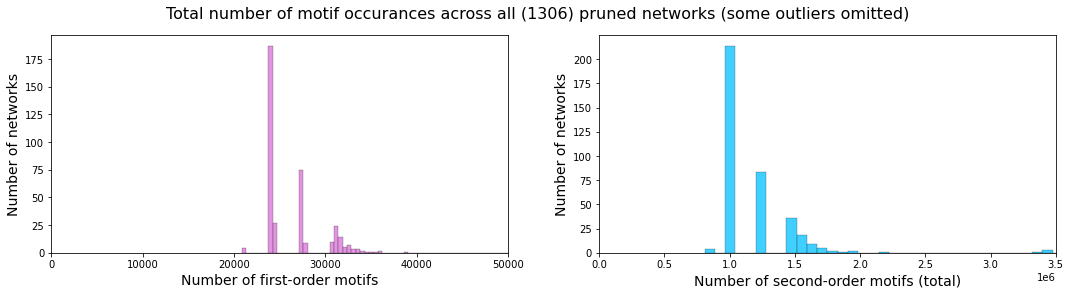

In [17]:
fig1, ((ax1, ax2)) = plt.subplots(1,2, figsize=(18,4))
fig1.suptitle('Total number of motif occurances across all (1306) pruned networks (some outliers omitted)', size=16)

sb.histplot(data=motifDF, x='First-order motifs', ax = ax1, bins = 200, color='orchid')
ax1.set_xlim([0,50000])
ax1.set_xlabel('Number of first-order motifs',fontsize=14)
ax1.set_ylabel('Number of networks',fontsize=14)

sb.histplot(data=motifDF, x='Second-order motifs (total)', ax = ax2, bins = 200, color='deepskyblue')
ax2.set_xlim([0,3500000])
ax2.set_xlabel('Number of second-order motifs (total)',fontsize=14)
ax2.set_ylabel('Number of networks',fontsize=14)


/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


First-order motif frequency is the total number of first-order motifs divided by the total number of possible occurances in a fully-connected graph.


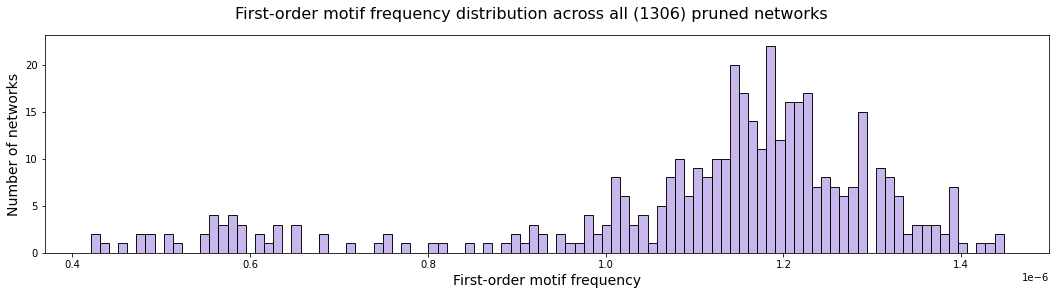

In [18]:
fig2, ax = plt.subplots(1,1, figsize=(18,4))
fig2.suptitle('First-order motif frequency distribution across all (1306) pruned networks', size=16)

sb.histplot(data=motifDF, x='First-order motif frequency', ax = ax, bins = 100, color='mediumpurple', kde=True)
ax.set_xlabel('First-order motif frequency',fontsize=14)
ax.set_ylabel('Number of networks',fontsize=14)

print('First-order motif frequency is the total number of first-order motifs divided by the total number of possible occurances in a fully-connected graph.')


Second-order motif frequency is the total number of second-order motifs divided by the total number of possible occurances in a fully-connected graph.


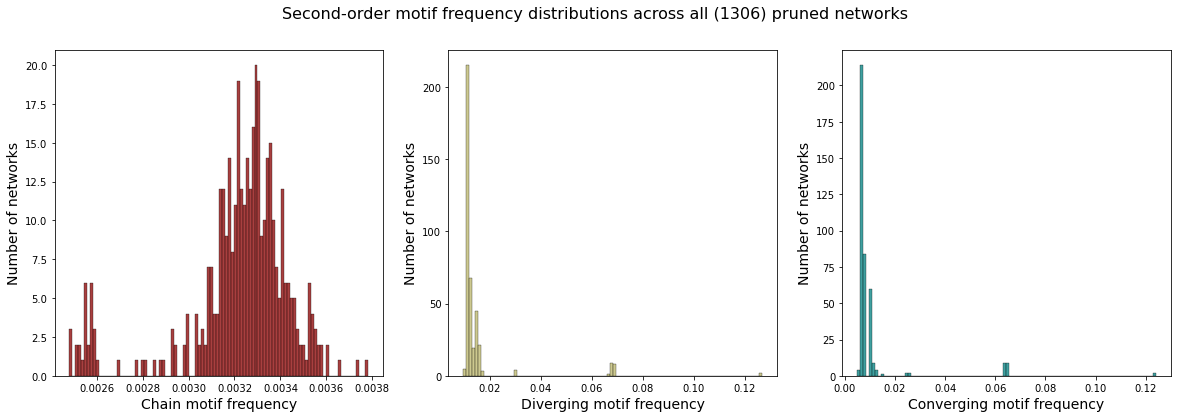

In [19]:
fig3, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20,6))
fig3.suptitle('Second-order motif frequency distributions across all (1306) pruned networks', size=16)

sb.histplot(data=motifDF, x='Second-order chain motif frequency', ax = ax1, bins = 100, color='darkred')
ax1.set_xlabel('Chain motif frequency',fontsize=14)
ax1.set_ylabel('Number of networks',fontsize=14)

sb.histplot(data=motifDF, x='Second-order diverging motif frequency', ax = ax2, bins = 100, color='darkkhaki')
ax2.set_xlabel('Diverging motif frequency',fontsize=14)
ax2.set_ylabel('Number of networks',fontsize=14)

sb.histplot(data=motifDF, x='Second-order converging motif frequency', ax = ax3, bins = 100, color='teal')
ax3.set_xlabel('Converging motif frequency',fontsize=14)
ax3.set_ylabel('Number of networks',fontsize=14)

print('Second-order motif frequency is the total number of second-order motifs divided by the total number of possible occurances in a fully-connected graph.')


Second-order chain motif moment mean: 0.0007955872204019277
Second-order chain motif moment skew: -1.7356579512890682
Second-order chain motif moment kurtosis: 3.3192497634470266
Diverging motif moment mean: 0.00023464822884483472
Diverging motif moment skew: 2.715323808756372
Diverging motif moment kurtosis: 8.482814848657549
Converging motif moment mean: -0.0016510835009315064
Converging motif moment skew: 1.565512041038802
Converging motif moment kurtosis: 4.668890054676908


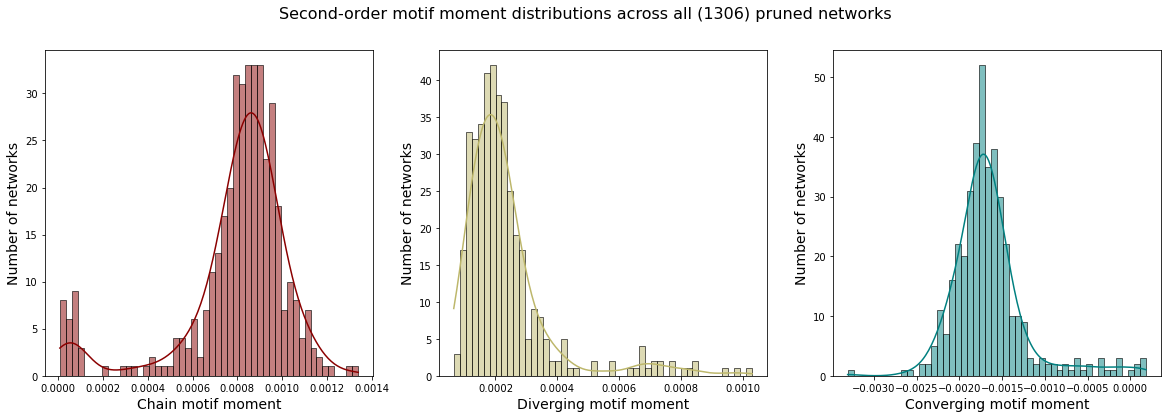

In [20]:
fig4, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20,6))
fig4.suptitle('Second-order motif moment distributions across all (1306) pruned networks', size=16)

sb.histplot(data=motifDF, x='Second-order chain motif moment', ax = ax1, bins = 50, color='darkred', kde=True)
ax1.set_xlabel('Chain motif moment',fontsize=14)
ax1.set_ylabel('Number of networks',fontsize=14)
print('Second-order chain motif moment mean: %s' % (motifDF['Second-order chain motif moment'].mean()))
print('Second-order chain motif moment skew: %s' % (motifDF['Second-order chain motif moment'].skew()))
print('Second-order chain motif moment kurtosis: %s' % (motifDF['Second-order chain motif moment'].kurtosis()))

sb.histplot(data=motifDF, x='Second-order diverging motif moment', ax = ax2, bins = 50, color='darkkhaki', kde=True)
ax2.set_xlabel('Diverging motif moment',fontsize=14)
ax2.set_ylabel('Number of networks',fontsize=14)
ax2.locator_params(axis='x', nbins=6)
print('Diverging motif moment mean: %s' % (motifDF['Second-order diverging motif moment'].mean()))
print('Diverging motif moment skew: %s' % (motifDF['Second-order diverging motif moment'].skew()))
print('Diverging motif moment kurtosis: %s' % (motifDF['Second-order diverging motif moment'].kurtosis()))

sb.histplot(data=motifDF, x='Second-order converging motif moment', ax = ax3, bins = 50, color='teal', kde=True)
ax3.set_xlabel('Converging motif moment',fontsize=14)
ax3.set_ylabel('Number of networks',fontsize=14)
print('Converging motif moment mean: %s' % (motifDF['Second-order converging motif moment'].mean()))
print('Converging motif moment skew: %s' % (motifDF['Second-order converging motif moment'].skew()))
print('Converging motif moment kurtosis: %s' % (motifDF['Second-order converging motif moment'].kurtosis()))

#print('Second-order motif moment is the second-order motif frequency minus the frequency of occurances in a randomly connected graph. A postive motif moment indicates an overrepresentation of that motif while a negative moment indicates an underrepresentation.')


/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Third-order chain motif moment mean: 5.448748410768583e-06
Third-order chain motif moment skew: 0.0
Third-order chain motif moment kurtosis: 0.29217939895378464
Diverging motif moment mean: 9.213162119069493e-05
Diverging motif moment skew: 3.860111922836566
Diverging motif moment kurtosis: 15.078117060724296
Converging motif moment mean: -0.0018742485061990783
Converging motif moment skew: -5.9342080400542265
Converging motif moment kurtosis: 43.695725411809036


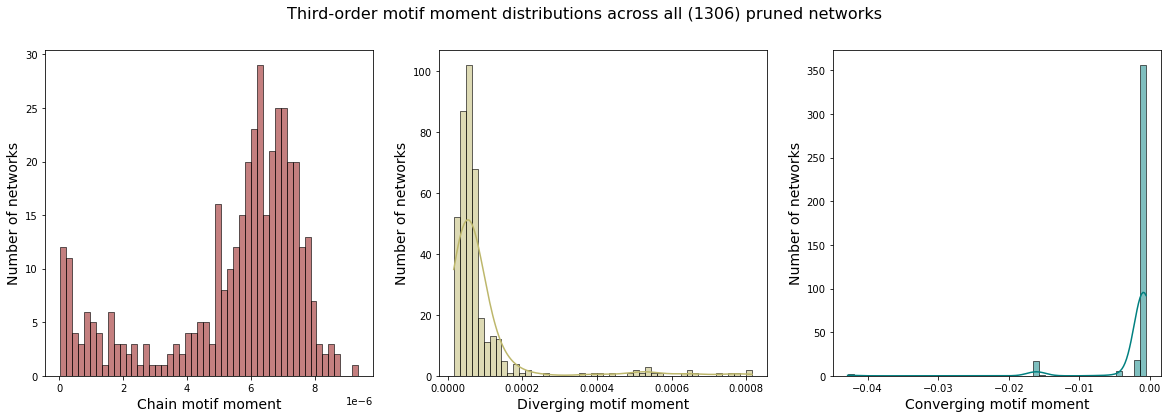

In [21]:
fig5, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20,6))
fig5.suptitle('Third-order motif moment distributions across all (1306) pruned networks', size=16)

sb.histplot(data=motifDF, x='Third-order chain motif moment', ax = ax1, bins = 50, color='darkred', kde=True)
ax1.set_xlabel('Chain motif moment',fontsize=14)
ax1.set_ylabel('Number of networks',fontsize=14)
print('Third-order chain motif moment mean: %s' % (motifDF['Third-order chain motif moment'].mean()))
print('Third-order chain motif moment skew: %s' % (motifDF['Third-order chain motif moment'].skew()))
print('Third-order chain motif moment kurtosis: %s' % (motifDF['Third-order chain motif moment'].kurtosis()))

sb.histplot(data=motifDF, x='Third-order diverging motif moment', ax = ax2, bins = 50, color='darkkhaki', kde=True)
ax2.set_xlabel('Diverging motif moment',fontsize=14)
ax2.set_ylabel('Number of networks',fontsize=14)
ax2.locator_params(axis='x', nbins=6)
print('Diverging motif moment mean: %s' % (motifDF['Third-order diverging motif moment'].mean()))
print('Diverging motif moment skew: %s' % (motifDF['Third-order diverging motif moment'].skew()))
print('Diverging motif moment kurtosis: %s' % (motifDF['Third-order diverging motif moment'].kurtosis()))

sb.histplot(data=motifDF, x='Third-order converging motif moment', ax = ax3, bins = 50, color='teal', kde=True)
ax3.set_xlabel('Converging motif moment',fontsize=14)
ax3.set_ylabel('Number of networks',fontsize=14)
print('Converging motif moment mean: %s' % (motifDF['Third-order converging motif moment'].mean()))
print('Converging motif moment skew: %s' % (motifDF['Third-order converging motif moment'].skew()))
print('Converging motif moment kurtosis: %s' % (motifDF['Third-order converging motif moment'].kurtosis()))

#print('Third-order motif moment is the third-order motif frequency minus the frequency of occurances in a randomly connected graph. A postive motif moment indicates an overrepresentation of that motif while a negative moment indicates an underrepresentation.')


<AxesSubplot:ylabel='Count'>

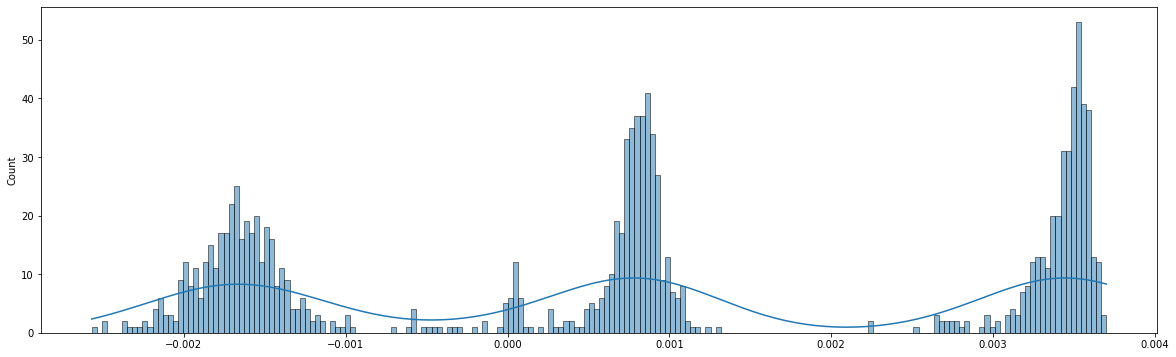

In [13]:
fig6, ax = plt.subplots(1,1, figsize=(20,6))
all_SOM = pd.concat([motifDF['Second-order chain motif moment'], motifDF['Second-order diverging motif moment'], motifDF['Second-order converging motif moment']])
sb.histplot(data=all_SOM, bins = 200, kde=True)

In [14]:
motifDF1 = motifDF.loc[motifDF['Sparsity Index'] == 1.0]
motifDF2 = motifDF.loc[motifDF['Sparsity Index'] == 2.0]
motifDF3 = motifDF.loc[motifDF['Sparsity Index'] == 3.0]
motifDF4 = motifDF.loc[motifDF['Sparsity Index'] == 4.0]
motifDF5 = motifDF.loc[motifDF['Sparsity Index'] == 5.0]
motifDF6 = motifDF.loc[motifDF['Sparsity Index'] == 6.0]
motifDF7 = motifDF.loc[motifDF['Sparsity Index'] == 7.0]
motifDF8 = motifDF.loc[motifDF['Sparsity Index'] == 8.0]
motifDF9 = motifDF.loc[motifDF['Sparsity Index'] == 9.0]
motifDF10 = motifDF.loc[motifDF['Sparsity Index'] == 10.0]
motifDF11 = motifDF.loc[motifDF['Sparsity Index'] == 11.0]
motifDF12 = motifDF.loc[motifDF['Sparsity Index'] == 12.0]
motifDF13 = motifDF.loc[motifDF['Sparsity Index'] == 13.0]
motifDF14 = motifDF.loc[motifDF['Sparsity Index'] == 14.0]
motifDF15 = motifDF.loc[motifDF['Sparsity Index'] == 15.0]
motifDF16 = motifDF.loc[motifDF['Sparsity Index'] == 16.0]
motifDF17 = motifDF.loc[motifDF['Sparsity Index'] == 17.0]
motifDF18 = motifDF.loc[motifDF['Sparsity Index'] == 18.0]
motifDF19 = motifDF.loc[motifDF['Sparsity Index'] == 19.0]

motifDFs = [motifDF6,
            motifDF7,
            motifDF8,
            motifDF9,
            motifDF10,
            motifDF11,
            motifDF12,
            motifDF13,
            motifDF14]

sparsities = ['65%', '75%', '85%', '90%', '91%', '92%', '93%', '94%', '95%']


In [15]:

for j in range(len(motifDFs)):
    count = 0 
    for i, row in motifDFs[j].iterrows():
        if row['Number of nodes in each layer'][1] > row['Number of connections in each layer'][0]:
            count += 1
        
    print('For networks pruned to ' + sparsities[j] + ', there are %s networks with active nodes in the first hidden layer without upstream inputs.' % count)

For networks pruned to 65%, there are 0 networks with active nodes in the first hidden layer without upstream inputs.
For networks pruned to 75%, there are 0 networks with active nodes in the first hidden layer without upstream inputs.
For networks pruned to 85%, there are 0 networks with active nodes in the first hidden layer without upstream inputs.
For networks pruned to 90%, there are 0 networks with active nodes in the first hidden layer without upstream inputs.
For networks pruned to 91%, there are 0 networks with active nodes in the first hidden layer without upstream inputs.
For networks pruned to 92%, there are 0 networks with active nodes in the first hidden layer without upstream inputs.
For networks pruned to 93%, there are 0 networks with active nodes in the first hidden layer without upstream inputs.
For networks pruned to 94%, there are 0 networks with active nodes in the first hidden layer without upstream inputs.
For networks pruned to 95%, there are 0 networks with ac

[Text(0, 0.5, '')]

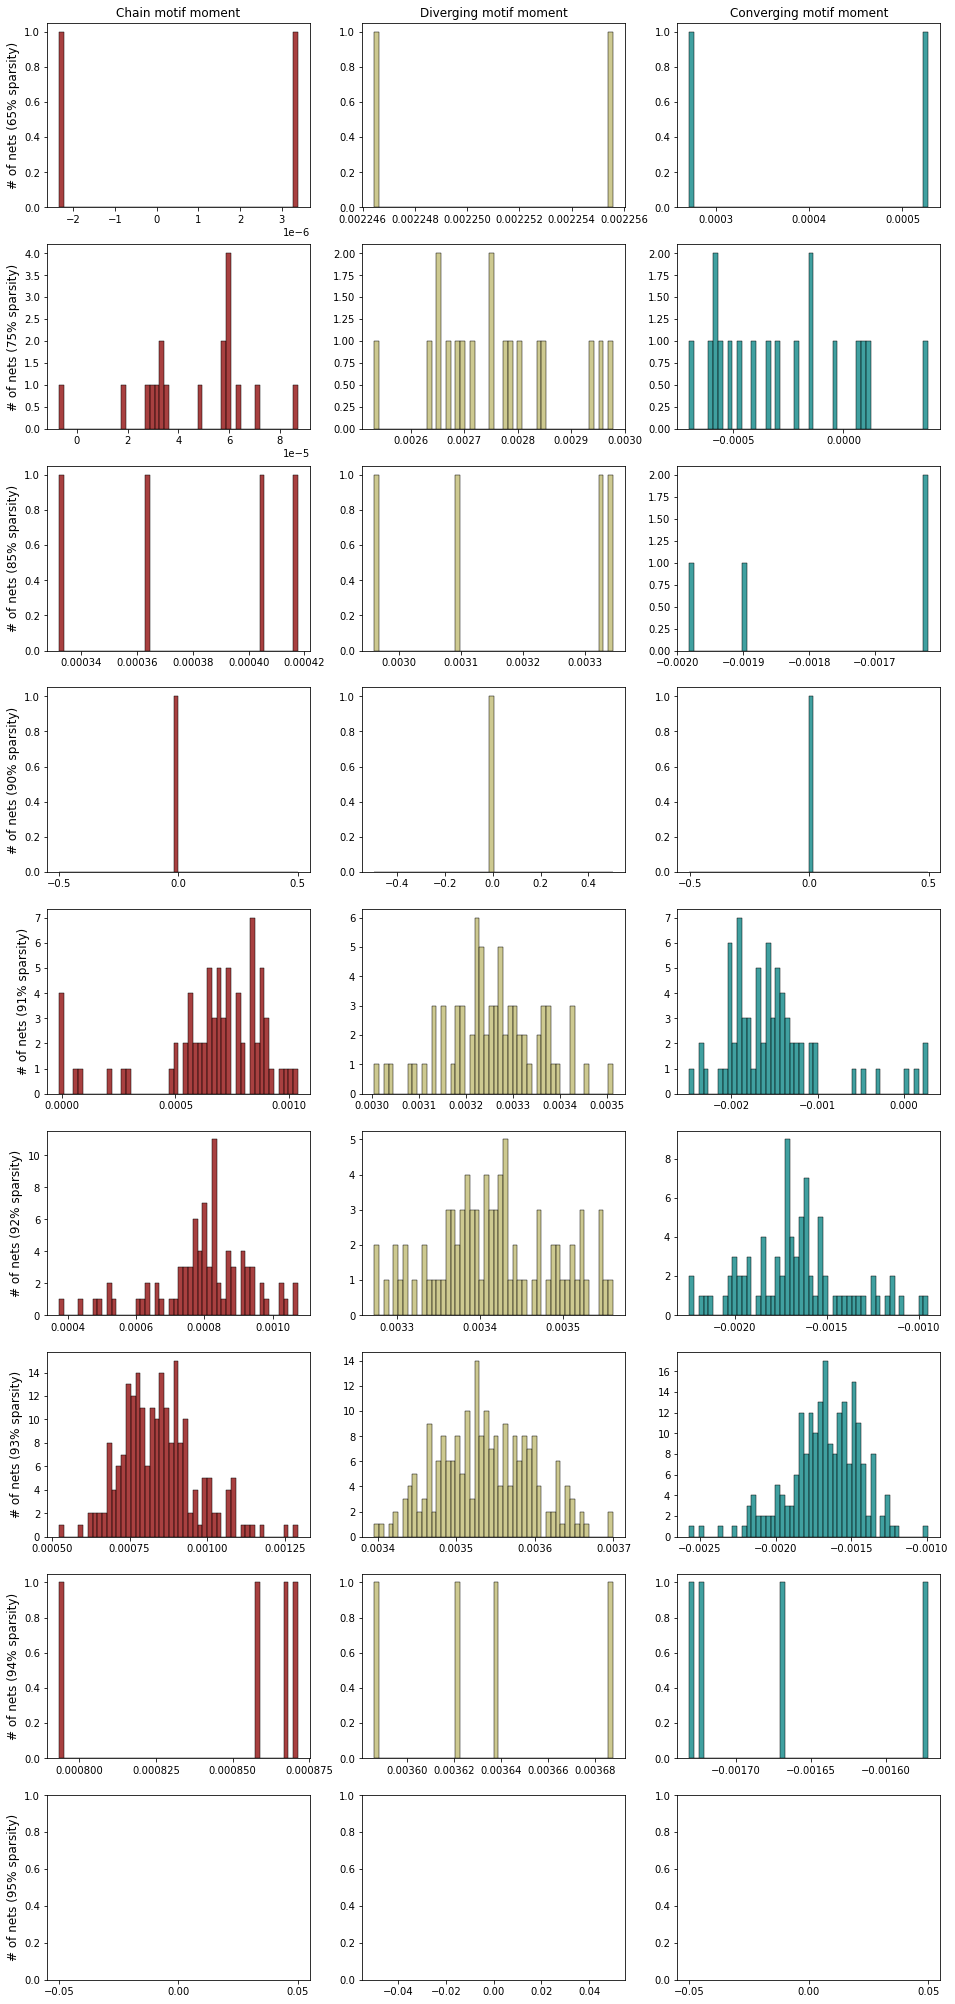

In [16]:
fig4, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15),(ax16,ax17,ax18),(ax19,ax20,ax21),(ax22,ax23,ax24),(ax25,ax26,ax27)) = plt.subplots(9,3, figsize=(16,36))


'''
Sparsity index 6: 65% sparsity 
'''
sb.histplot(data=motifDF6, x='Second-order chain motif moment', ax = ax1, bins = 50, color='darkred')
ax1.set_title('Chain motif moment',fontsize=12)
ax1.set_ylabel('# of nets (65% sparsity)',fontsize=12)
ax1.set(xlabel=None)

sb.histplot(data=motifDF6, x='Second-order diverging motif moment', ax = ax2, bins = 50, color='darkkhaki')
ax2.set_title('Diverging motif moment',fontsize=12)
ax2.locator_params(axis='x', nbins=6)
ax2.set(xlabel=None)
ax2.set(ylabel=None)

sb.histplot(data=motifDF6, x='Second-order converging motif moment', ax = ax3, bins = 50, color='teal')
ax3.set_title('Converging motif moment',fontsize=12)
ax3.locator_params(axis='x', nbins=4)
ax3.set(xlabel=None)
ax3.set(ylabel=None)


'''
Sparsity index 7: 75% sparsity 
'''
sb.histplot(data=motifDF7, x='Second-order chain motif moment', ax = ax4, bins = 50, color='darkred')
ax4.set_ylabel('# of nets (75% sparsity)',fontsize=12)
ax4.set(xlabel=None)

sb.histplot(data=motifDF7, x='Second-order diverging motif moment', ax = ax5, bins = 50, color='darkkhaki')
ax5.locator_params(axis='x', nbins=6)
ax5.set(xlabel=None)
ax5.set(ylabel=None)

sb.histplot(data=motifDF7, x='Second-order converging motif moment', ax = ax6, bins = 50, color='teal')
ax6.locator_params(axis='x', nbins=4)
ax6.set(xlabel=None)
ax6.set(ylabel=None)


'''
Sparsity index 8: 85% sparsity 
'''
sb.histplot(data=motifDF8, x='Second-order chain motif moment', ax = ax7, bins = 50, color='darkred')
ax7.set_ylabel('# of nets (85% sparsity)',fontsize=12)
ax7.set(xlabel=None)

sb.histplot(data=motifDF8, x='Second-order diverging motif moment', ax = ax8, bins = 50, color='darkkhaki')
ax8.locator_params(axis='x', nbins=6)
ax8.set(xlabel=None)
ax8.set(ylabel=None)

sb.histplot(data=motifDF8, x='Second-order converging motif moment', ax = ax9, bins = 50, color='teal')
ax9.locator_params(axis='x', nbins=4)
ax9.set(xlabel=None)
ax9.set(ylabel=None)


'''
Sparsity index 9: 90% sparsity 
'''
sb.histplot(data=motifDF9, x='Second-order chain motif moment', ax = ax10, bins = 50, color='darkred')
ax10.set_ylabel('# of nets (90% sparsity)',fontsize=12)
ax10.locator_params(axis='x', nbins=4)
ax10.set(xlabel=None)

sb.histplot(data=motifDF9, x='Second-order diverging motif moment', ax = ax11, bins = 50, color='darkkhaki')
ax11.locator_params(axis='x', nbins=6)
ax11.set(xlabel=None)
ax11.set(ylabel=None)

sb.histplot(data=motifDF9, x='Second-order converging motif moment', ax = ax12, bins = 50, color='teal')
ax12.locator_params(axis='x', nbins=4)
ax12.set(xlabel=None)
ax12.set(ylabel=None)


'''
Sparsity index 10: 91% sparsity 
'''
sb.histplot(data=motifDF10, x='Second-order chain motif moment', ax = ax13, bins = 50, color='darkred')
ax13.set_ylabel('# of nets (91% sparsity)',fontsize=12)
ax13.locator_params(axis='x', nbins=4)
ax13.set(xlabel=None)

sb.histplot(data=motifDF10, x='Second-order diverging motif moment', ax = ax14, bins = 50, color='darkkhaki')
ax14.locator_params(axis='x', nbins=6)
ax14.set(xlabel=None)
ax14.set(ylabel=None)

sb.histplot(data=motifDF10, x='Second-order converging motif moment', ax = ax15, bins = 50, color='teal')
ax15.locator_params(axis='x', nbins=4)
ax15.set(xlabel=None)
ax15.set(ylabel=None)


'''
Sparsity index 11: 92% sparsity 
'''
sb.histplot(data=motifDF11, x='Second-order chain motif moment', ax = ax16, bins = 50, color='darkred')
ax16.set_ylabel('# of nets (92% sparsity)',fontsize=12)
ax16.locator_params(axis='x', nbins=4)
ax16.set(xlabel=None)

sb.histplot(data=motifDF11, x='Second-order diverging motif moment', ax = ax17, bins = 50, color='darkkhaki')
ax17.locator_params(axis='x', nbins=6)
ax17.set(xlabel=None)
ax17.set(ylabel=None)

sb.histplot(data=motifDF11, x='Second-order converging motif moment', ax = ax18, bins = 50, color='teal')
ax18.locator_params(axis='x', nbins=4)
ax18.set(xlabel=None)
ax18.set(ylabel=None)


'''
Sparsity index 12: 93% sparsity 
'''
sb.histplot(data=motifDF12, x='Second-order chain motif moment', ax = ax19, bins = 50, color='darkred')
ax19.set_ylabel('# of nets (93% sparsity)',fontsize=12)
ax19.locator_params(axis='x', nbins=4)
ax19.set(xlabel=None)

sb.histplot(data=motifDF12, x='Second-order diverging motif moment', ax = ax20, bins = 50, color='darkkhaki')
ax20.locator_params(axis='x', nbins=6)
ax20.set(xlabel=None)
ax20.set(ylabel=None)

sb.histplot(data=motifDF12, x='Second-order converging motif moment', ax = ax21, bins = 50, color='teal')
ax21.locator_params(axis='x', nbins=4)
ax21.set(xlabel=None)
ax21.set(ylabel=None)


'''
Sparsity index 13: 94% sparsity 
'''
sb.histplot(data=motifDF13, x='Second-order chain motif moment', ax = ax22, bins = 50, color='darkred')
ax22.set_ylabel('# of nets (94% sparsity)',fontsize=12)
ax22.locator_params(axis='x', nbins=4)
ax22.set(xlabel=None)

sb.histplot(data=motifDF13, x='Second-order diverging motif moment', ax = ax23, bins = 50, color='darkkhaki')
ax23.locator_params(axis='x', nbins=6)
ax23.set(xlabel=None)
ax23.set(ylabel=None)

sb.histplot(data=motifDF13, x='Second-order converging motif moment', ax = ax24, bins = 50, color='teal')
ax24.locator_params(axis='x', nbins=4)
ax24.set(xlabel=None)
ax24.set(ylabel=None)


'''
Sparsity index 14: 95% sparsity 
'''
sb.histplot(data=motifDF14, x='Second-order chain motif moment', ax = ax25, bins = 50, color='darkred')
ax25.set_ylabel('# of nets (95% sparsity)',fontsize=12)
ax25.locator_params(axis='x', nbins=4)
ax25.set(xlabel=None)

sb.histplot(data=motifDF14, x='Second-order diverging motif moment', ax = ax26, bins = 50, color='darkkhaki')
ax26.locator_params(axis='x', nbins=6)
ax26.set(xlabel=None)
ax26.set(ylabel=None)

sb.histplot(data=motifDF14, x='Second-order converging motif moment', ax = ax27, bins = 50, color='teal')
ax27.locator_params(axis='x', nbins=4)
ax27.set(xlabel=None)
ax27.set(ylabel=None)


In [17]:
motifstatsDF = pd.DataFrame(columns=['First-order motifs mean', 'First-order motifs variance', 'Second-order diverging motifs mean', 'Second-order diverging motifs variance','Second-order converging motifs mean', 'Second-order converging motifs variance', 'Second-order chain motifs mean', 'Second-order chain motifs variance'])

for df in motifDFs:
    stats = [df['First-order motifs'].mean(), 
             df['First-order motifs'].var(),
             df['Second-order diverging motifs'].mean(), 
             df['Second-order diverging motifs'].var(),
             df['Second-order converging motifs'].mean(), 
             df['Second-order converging motifs'].var(),
             df['Second-order chain motifs'].mean(), 
             df['Second-order chain motifs'].var()]
    motifstatsDF.loc[len(motifstatsDF.index)] = stats
    
sparsity_ind = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17, 18, 19]
motifstatsDF['Sparsity Index'] = sparsity_ind



ValueError: Length of values (19) does not match length of index (9)

In [ ]:
motifstatsDF

In [ ]:
sparseNetworks[0][1][2][0]

NameError: name 'epochlossesFIG' is not defined

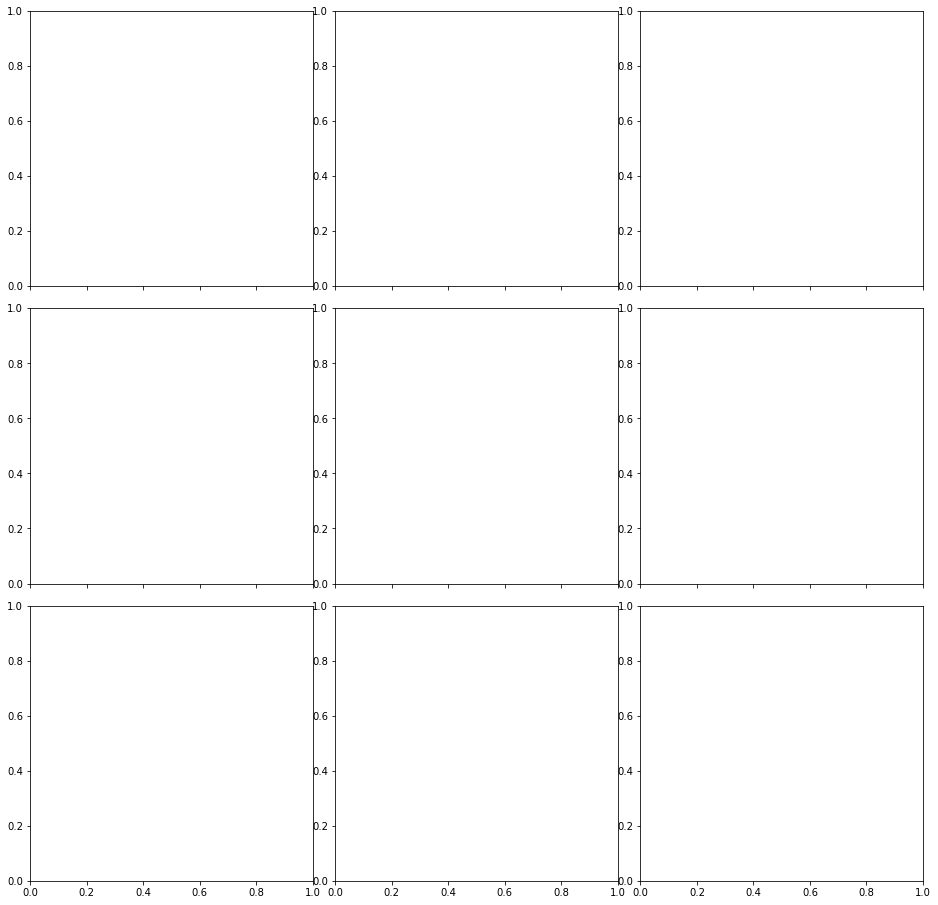

In [19]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(16,16), sharex=True)
fig.subplots_adjust(hspace=0.08, wspace=0.08)

ax1.plot(epochlossesFIG[:,9], color='#2b2688', alpha = 0.6, linewidth=.4)
ax1.set_yscale('log')
ax1.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax1.set_xlim(0,70400)
ax1.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax1.plot(60598, .15, 'v', color='black')
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax2.plot(epochlossesFIG[:,1], color='#2b2688', alpha = 0.6, linewidth=.4)
ax2.set_yscale('log')
ax2.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax2.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax2.plot(60598, .12, 'v', color='black')
ax2.set_xlim(0,70400)
ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax3.plot(epochlossesFIG[:,2], color='#2b2688', alpha = 0.6, linewidth=.4)
ax3.set_yscale('log')
ax3.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax3.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax3.plot(60598, .11, 'v', color='black')
ax3.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax3.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',    # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax4.plot(epochlossesFIG[:,3], color='#2b2688', alpha = 0.6, linewidth=.4)
ax4.set_yscale('log')
ax4.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax4.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax4.plot(60598, .3, 'v', color='black')
ax4.set_xlim(0,70400)
ax4.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax4.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax5.plot(epochlossesFIG[:,4], color='#2b2688', alpha = 0.6, linewidth=.4)
ax5.set_yscale('log')
ax5.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax5.axvline(x=57999, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax5.plot(57998, .3, 'v', color='black')
ax5.set_xlim(0,70400)
ax5.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax5.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax6.plot(epochlossesFIG[:,5], color='#2b2688', alpha = 0.6, linewidth=.4)
ax6.set_yscale('log')
ax6.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax6.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax6.plot(60598, .3, 'v', color='black')
ax6.set_xlim(0,70400)
ax6.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax6.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax7.plot(epochlossesFIG[:,6], color='#2b2688', alpha = 0.6, linewidth=.4)
ax7.set_yscale('log')
ax7.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax7.axvline(x=60599, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax7.plot(60598, .24, 'v', color='black')
ax7.set_xlim(0,70400)
ax7.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=True,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

ax7.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',   # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=True) 

ax8.plot(epochlossesFIG[:,7], color='#2b2688', alpha = 0.6, linewidth=.4)
ax8.set_yscale('log')
ax8.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax8.axvline(x=64999, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax8.plot(64998, .3, 'v', color='black')
ax8.set_xlim(0,70400)
ax8.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax8.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

ax9.plot(epochlossesFIG[:,8], color='#2b2688', alpha = 0.6, linewidth=.4)
ax9.set_yscale('log')
ax9.hlines(0.001, 0, 70400, color='r', linestyles='dashed')
ax9.axvline(x=64999, ymax=0.8, color='k', linewidth=1.5, alpha = 0.8, marker='v', markevery=(1,1))
#ax9.plot(64998, .3, 'v', color='black')
ax9.set_xlim(0,70400)
ax9.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',
    bottom=False,      # ticks along the bottom edge are off
    top=False,   # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax9.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',     # ticks along the bottom edge are off
    right=False,   # both major and minor ticks are affected
    labelleft=False) 

In [3]:
sparseNets = sparseNets + sparseNets1 + sparseNets2 + sparseNets3 + sparseNetsSmall + sparseNetsFIG
len(sparseNets)

1306

In [20]:
numTotal = np.zeros((len(sparseNets),5))

for j in range(len(sparseNets)):
    net = sparseNets[j]
    wts = net[1]
    netTotal = []
    for i  in range(0, 10, 2):
        numNonZero = np.count_nonzero(wts[i])
        netTotal.append(numNonZero)
    numTotal[j][:] = netTotal
        

In [21]:
print(numTotal)
#Each row is the number of nonzero weights for each layer in a given network. 
#Ten networks total right now 

print('Pruning indices correspond to rows above:')
for net in sparseNets:
    print(net[0])

[[2.7900e+02 1.1199e+04 1.1199e+04 4.4700e+02 7.0000e+00]
 [4.6900e+02 1.5114e+04 1.4400e+04 5.7500e+02 1.0000e+01]
 [2.9600e+02 1.1199e+04 1.1199e+04 4.4700e+02 7.0000e+00]
 ...
 [4.4400e+02 1.4403e+04 1.4399e+04 5.7600e+02 1.0000e+01]
 [3.0500e+02 1.1199e+04 1.1199e+04 4.4700e+02 7.0000e+00]
 [5.1900e+02 1.4863e+04 1.5497e+04 6.4100e+02 1.0000e+01]]
Pruning indices correspond to rows above:
12
10
12
11
12
10
12
12
12
10
12
11
12
12
12
12
11
10
11
7
10
10
12
12
12
12
12
12
12
12
11
11
12
12
12
10
10
10
11
10
11
12
11
12
11
12
12
10
12
12
12
12
12
10
11
12
12
12
10
12
12
12
11
12
10
12
7
10
12
12
12
11
12
11
12
7
11
12
12
11
11
11
11
11
12
12
10
11
12
12
10
12
11
10
12
12
7
12
12
11
12
12
6
12
12
12
12
12
12
10
10
10
12
10
10
11
12
12
11
12
11
12
11
7
12
12
12
12
12
12
12
11
12
10
12
7
12
12
12
12
12
12
12
11
12
10
10
10
10
12
12
8
10
12
10
10
12
12
10
11
12
11
10
11
7
10
12
7
11
12
12
11
12
11
12
12
11
12
10
12
12
10
11
7
11
10
12
12
12
7
12
12
10
12
12
11
10
12
11
10
12
11
12
12
12
1

In [22]:
pruneInds = [net[0] for net in sparseNets]
pruneInds = np.array(pruneInds)

In [23]:
print(np.count_nonzero(pruneInds == 12))

214


In [24]:
counts = [np.count_nonzero(pruneInds == i) for i in np.arange(18)]

In [25]:
countsDF = pd.DataFrame(counts)

In [26]:
countsDF

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,2
7,18
8,4
9,1


In [27]:
pruneIndsDF = pd.DataFrame(pruneInds)

In [28]:
sum(counts)

400

In [29]:
pal = sb.color_palette("CMRmap_r")
print(pal.as_hex())

['#e6e172', '#e6ad12', '#f06510', '#c4385a', '#632aad', '#2b2688']


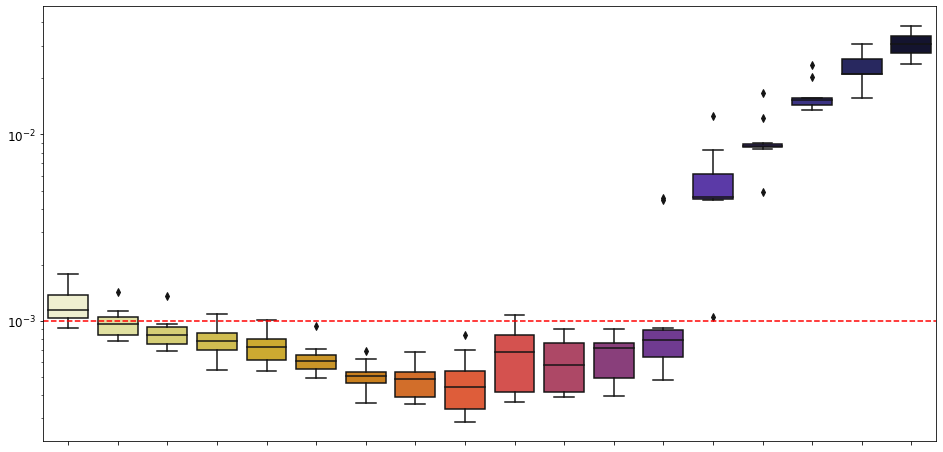

In [30]:
fig, ax1 = plt.subplots(1, figsize=(16,8))
sb.boxplot(data=lossesDF, palette='CMRmap_r', ax=ax1)
ax1.axhline(y=10e-4, color='r', linestyle='--')
#ax1.set_title('Losses of networks after pruning', fontsize=20)
#ax1.set_xlabel("Sparsity of network", fontsize=18)
#ax1.set_ylabel("Mean-squared error", fontsize=18)
ax1.set_yscale('log')
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected        # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelleft=True)         # ticks along the top edge are off

In [31]:
lossesDF['25%'].median()

0.000843047371090767

/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


"\nax1.tick_params(\n    axis='y',          # changes apply to the x-axis\n    which='both',      # both major and minor ticks are affected\n    right=False,      # ticks along the bottom edge are off\n    labelsize=12,\n    labelleft=False)   \n"

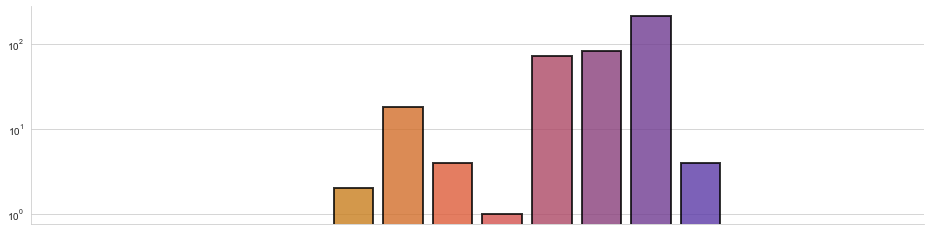

In [32]:
sb.set_style("whitegrid")
fig, ax1 = plt.subplots(1, figsize=(16,4))
sb.barplot(np.arange(18), counts, palette='CMRmap_r', alpha = 0.8, linewidth=2, edgecolor=".01")
plt.yscale('log')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
'''
ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    labelsize=12,
    labelleft=False)   
'''

/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


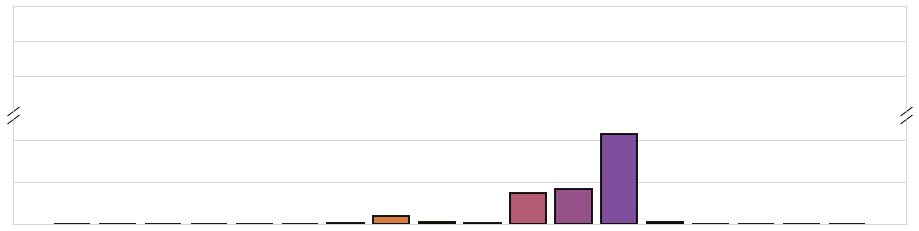

In [33]:
sb.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (16,4))
fig.subplots_adjust(hspace=0.08)

#clrs = ['grey' if (x < max(counts)) else '#2b7bba' for x in counts]

sb.barplot(np.arange(18), counts, palette='CMRmap_r', ax=ax1, alpha = 0.9, linewidth=2, edgecolor=".01")
sb.barplot(np.arange(18), counts, palette='CMRmap_r', ax=ax2, alpha = 0.9, linewidth=2, edgecolor=".01")

ax1.set_ylim(800, 860)  # outliers only
ax2.set_ylim(0, 250) 

# hide the spines between ax and ax2
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
#ax1.spines['right'].set_visible(False)
#ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax1.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    labelsize=12,
    labelleft=False)         # ticks along the top edge are off

ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
    labelsize=12,
    labelleft=False)         # ticks along the top edge are off

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)         # ticks along the top edge are off

ax1.tick_params(labeltop=False)  # don't put tick labels at the top
#ax2.xaxis.tick_bottom()

d = .75  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

#ax1.set_xlim([5,15])
#plt.xticks([6,7,8,9,10,11,12,13,14],['65%','75%','85%','90%','91%','92%','93%','94%','95%'], fontsize=12)
#ax1.set_title('Number sparse networks below pruning threshold', fontsize=20)
#fig.text(0.06, 0.5, 'Number of networks', fontsize=18, ha='center', va='center', rotation='vertical')
#fig.text(0.5, 0.04, "Sparsity of network", fontsize=18, ha='center', va='center')

In [18]:
numTotal6 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 6:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal6.append(netTotal)

numTotal6DF = pd.DataFrame(numTotal6, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [27]:
numTotal6DF.head()

,layer 1,layer 2,layer 3,layer 4,layer 5
0,1399,55999,55999,2239,39
1,1399,55999,55999,2239,39


In [19]:
numTotal7 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 7:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal7.append(netTotal)

numTotal7DF = pd.DataFrame(numTotal7, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [28]:
numTotal7DF.head()

,layer 1,layer 2,layer 3,layer 4,layer 5
0,999,39999,39999,1599,27
1,999,39999,39999,1599,27
2,999,39999,39999,1599,27
3,999,39999,39999,1599,27
4,999,39999,39999,1599,27


In [20]:
numTotal8 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 8:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal8.append(netTotal)

numTotal8DF = pd.DataFrame(numTotal8, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [29]:
numTotal8DF.head()

,layer 1,layer 2,layer 3,layer 4,layer 5
0,599,23999,23999,959,16
1,599,23999,23999,959,16
2,599,23999,23999,959,16
3,599,23999,23999,959,16
4,599,23999,23999,959,16


In [21]:
numTotal9 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 9:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal9.append(netTotal)

numTotal9DF = pd.DataFrame(numTotal9, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [30]:
numTotal9DF.head()

,layer 1,layer 2,layer 3,layer 4,layer 5
0,399,15999,15999,639,11
1,399,15999,15999,639,11


In [22]:
numTotal10 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 10:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal10.append(netTotal)     

numTotal10DF = pd.DataFrame(numTotal10, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [35]:
numTotal10DF

,layer 1,layer 2,layer 3,layer 4,layer 5
0,401,14702,14399,575,24
1,449,15282,14399,575,13
2,471,14898,14399,575,17
3,425,14715,14399,575,10
4,443,14960,14399,575,108
...,...,...,...,...,...
227,440,14646,14399,603,10
228,561,15926,14449,576,10
229,441,14963,14399,575,11
230,414,14721,14399,575,12


In [36]:
numTotal11 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 11:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal11.append(netTotal)
        
numTotal11DF = pd.DataFrame(numTotal11, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [37]:
numTotal11DF

,layer 1,layer 2,layer 3,layer 4,layer 5
0,319,12799,12799,514,8
1,319,12799,12799,511,8
2,319,12799,12799,511,8
3,319,12799,12799,511,9
4,319,12799,12799,511,8
...,...,...,...,...,...
102,319,12799,12799,511,8
103,319,12799,12799,538,8
104,319,12799,12799,511,10
105,319,12799,12799,511,8


In [24]:
numTotal12 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 12:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal12.append(netTotal)

numTotal12DF = pd.DataFrame(numTotal12, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
        
numTotal12DF['layer 1'] = numTotal12DF['layer 1']/(10*400)
numTotal12DF['layer 2'] = numTotal12DF['layer 2']/(400*400)
numTotal12DF['layer 3'] = numTotal12DF['layer 3']/(400*400)
numTotal12DF['layer 4'] = numTotal12DF['layer 4']/(400*16)
numTotal12DF['layer 5'] = numTotal12DF['layer 5']/(16*7)

In [38]:
numTotal12DF

,layer 1,layer 2,layer 3,layer 4,layer 5
0,0.06975,0.069994,0.069994,0.069844,0.062500
1,0.07075,0.069994,0.069994,0.069844,0.089286
2,0.06975,0.069994,0.069994,0.069844,0.080357
3,0.06975,0.069994,0.069994,0.069844,0.062500
4,0.06975,0.069994,0.069994,0.069844,0.062500
...,...,...,...,...,...
853,0.06975,0.069994,0.069994,0.069844,0.062500
854,0.06975,0.069994,0.069994,0.069844,0.062500
855,0.07000,0.069994,0.069994,0.069844,0.062500
856,0.06975,0.069994,0.069994,0.069844,0.062500


In [25]:
numTotal13 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 13:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal13.append(netTotal)

numTotal13DF = pd.DataFrame(numTotal13, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

In [26]:
numTotal14 = []

for j in range(len(sparseNets)):
    if sparseNets[j][0] == 14:
        net = sparseNets[j]
        wts = net[1]
        netTotal = []
        for i  in range(0, 10, 2):
            numNonZero = np.count_nonzero(wts[i])
            netTotal.append(numNonZero)
        numTotal14.append(netTotal)

numTotal14DF = pd.DataFrame(numTotal14, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

Text(0.5, 0, 'Percent of nonzero weights')

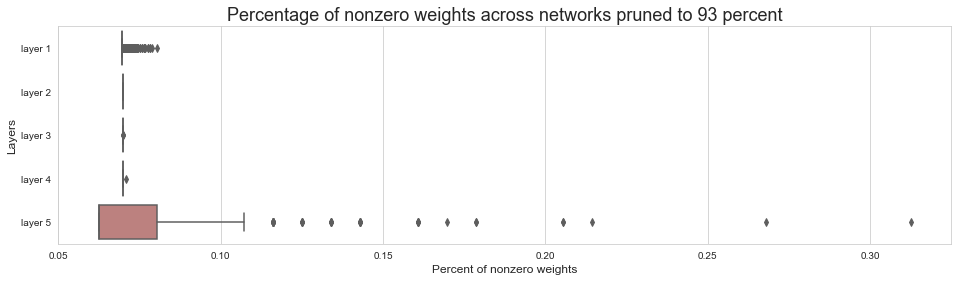

In [30]:
fig, ax1 = plt.subplots(1, figsize = (16,4))
sb.boxplot(data=numTotal12DF, orient='h', palette="vlag")
#sb.stripplot(data=numTotal12DF, orient='h', size=4, color=".3", linewidth=0)
ax1.set_title('Percentage of nonzero weights across networks pruned to 93 percent', fontsize=18)
ax1.set_ylabel("Layers", fontsize=12)
ax1.set_xlabel("Percent of nonzero weights", fontsize=12)

<AxesSubplot:xlabel='layer 5', ylabel='Count'>

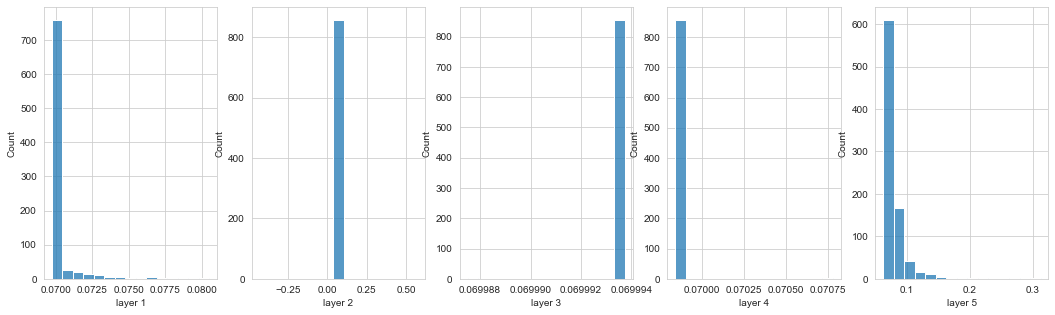

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=numTotal12DF['layer 1'], bins = 15)
sb.histplot(ax= ax2, data=numTotal12DF['layer 2'], bins = 15)
sb.histplot(ax= ax3, data=numTotal12DF['layer 3'], bins = 15)
sb.histplot(ax= ax4, data=numTotal12DF['layer 4'], bins = 15)
sb.histplot(ax= ax5, data=numTotal12DF['layer 5'], bins = 15)

In [32]:
numTotal12DF

,layer 1,layer 2,layer 3,layer 4,layer 5
0,0.06975,0.069994,0.069994,0.069844,0.062500
1,0.07075,0.069994,0.069994,0.069844,0.089286
2,0.06975,0.069994,0.069994,0.069844,0.080357
3,0.06975,0.069994,0.069994,0.069844,0.062500
4,0.06975,0.069994,0.069994,0.069844,0.062500
...,...,...,...,...,...
853,0.06975,0.069994,0.069994,0.069844,0.062500
854,0.06975,0.069994,0.069994,0.069844,0.062500
855,0.07000,0.069994,0.069994,0.069844,0.062500
856,0.06975,0.069994,0.069994,0.069844,0.062500


In [33]:
print(np.mean(numTotal12DF['layer 1']))
print(np.mean(numTotal12DF['layer 2']))
print(np.mean(numTotal12DF['layer 3']))
print(np.mean(numTotal12DF['layer 4']))
print(np.mean(numTotal12DF['layer 5']))

print(np.std(numTotal12DF['layer 1']))
print(np.std(numTotal12DF['layer 2']))
print(np.std(numTotal12DF['layer 3']))
print(np.std(numTotal12DF['layer 4']))
print(np.std(numTotal12DF['layer 5']))


0.07009877622377575
0.06999375000000042
0.06999372814685358
0.06984484265734141
0.07401973026973035
0.001194058823676505
4.3021142204224816e-16
3.689235798979949e-07
3.19870654901765e-05
0.021803936731780754


In [34]:
print(np.mean(numTotal12DF['layer 1']))
print(np.mean(numTotal12DF['layer 2']))
print(np.mean(numTotal12DF['layer 3']))
print(np.mean(numTotal12DF['layer 4']))
print(np.mean(numTotal12DF['layer 5']))

0.07009877622377575
0.06999375000000042
0.06999372814685358
0.06984484265734141
0.07401973026973035


In [35]:
print(np.var(numTotal12DF['layer 1']))
print(np.var(numTotal12DF['layer 2']))
print(np.var(numTotal12DF['layer 3']))
print(np.var(numTotal12DF['layer 4']))
print(np.var(numTotal12DF['layer 5']))

1.425776474399719e-06
1.8508186765561337e-31
1.3610460780475223e-13
1.0231723586728403e-09
0.00047541165700349796


In [36]:
#Conclusions so far 
#When comparing number of nonzero weights, there is a network stucture that seems to arise 

#need to compare the acutal value of the weights, maybe z test to compare distributions? 
#z test won't capture connectivity 

#prune only inner layers after 93 percent pruned 
#movie of network weight distributions 
#compared layer weight distributions 

In [46]:
sparseNets6 = [net[1] for net in sparseNets if net[0]==6]
sparseNets7 = [net[1] for net in sparseNets if net[0]==7]
sparseNets8 = [net[1] for net in sparseNets if net[0]==8]
sparseNets9 = [net[1] for net in sparseNets if net[0]==9]
sparseNets10 = [net[1] for net in sparseNets if net[0]==10]
sparseNets11 = [net[1] for net in sparseNets if net[0]==11]
sparseNets12 = [net[1] for net in sparseNets if net[0]==12]
sparseNets13 = [net[1] for net in sparseNets if net[0]==13]
sparseNets14 = [net[1] for net in sparseNets if net[0]==14]

In [47]:
sparseNets6 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets6]
sparseNets7 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets7]
sparseNets8 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets8]
sparseNets9 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets9]
sparseNets10 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets10]
sparseNets11 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets11]
sparseNets12 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets12]
sparseNets13 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets13]
sparseNets14 = [[net[0],net[2],net[4],net[6],net[8]] for net in sparseNets14]

In [48]:
sparseNets6DF = pd.DataFrame(sparseNets6, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets7DF = pd.DataFrame(sparseNets7, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets8DF = pd.DataFrame(sparseNets8, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets9DF = pd.DataFrame(sparseNets9, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets10DF = pd.DataFrame(sparseNets10, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets11DF = pd.DataFrame(sparseNets11, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets12DF = pd.DataFrame(sparseNets12, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets13DF = pd.DataFrame(sparseNets13, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])
sparseNets14DF = pd.DataFrame(sparseNets14, columns=['layer 1', 'layer 2', 'layer 3', 'layer 4', 'layer 5'])

Text(0, 0.5, 'Number of weights')

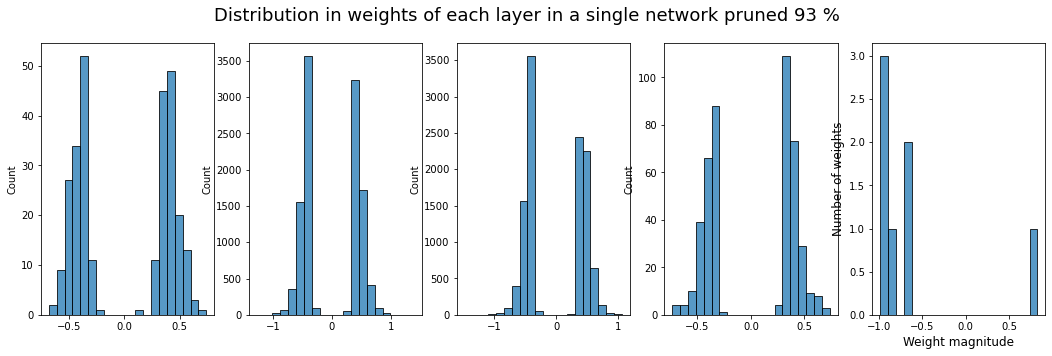

In [49]:
net1lay1 = sparseNets12DF['layer 1'][0].flatten()
net1lay2 = sparseNets12DF['layer 2'][0].flatten()
net1lay3 = sparseNets12DF['layer 3'][0].flatten()
net1lay4 = sparseNets12DF['layer 4'][0].flatten()
net1lay5 = sparseNets12DF['layer 5'][0].flatten()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (18,5))
sb.histplot(net1lay1[net1lay1 != 0], bins=20, ax=ax1)
sb.histplot(net1lay2[net1lay2 != 0], bins=20, ax=ax2)
sb.histplot(net1lay3[net1lay3 != 0], bins=20, ax=ax3)
sb.histplot(net1lay4[net1lay4 != 0], bins=20, ax=ax4)
sb.histplot(net1lay5[net1lay5 != 0], bins=20, ax=ax5)

fig.suptitle('Distribution in weights of each layer in a single network pruned 93 %', fontsize=18)
plt.xlabel("Weight magnitude", fontsize=12)
plt.ylabel("Number of weights", fontsize=12)

In [51]:
sparseNets12DF['layer 5'][0]

array([[-0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ],
       [ 0.        , -0.        , -0.        ,  0.        ,  0.        ,
        -0.        , -0.        ],
       [ 0.        , -0.        ,  0.        ,  0.        , -0.        ,
        -0.        ,  0.        ],
       [-0.94815487, -0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ],
       [ 0.        , -0.91610426,  0.        , -0.        , -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.6455378 , -0.64116514],
       [ 0.        , -0.        , -0.        , -0.        ,  0.        ,
        -0.        , -0.        ],
       [ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
         0.        , -0.        ],
       [ 0.        , -0.        , -0.        , -0.        , -0.8715828 ,
         0.        ,  0.        ],
       [-0.        , -0.    

In [52]:
nonZeroFirstLayer6 = np.zeros((sparseNets6DF.shape[0],10))
nonZeroFirstLayer7 = np.zeros((sparseNets7DF.shape[0],10))
nonZeroFirstLayer8 = np.zeros((sparseNets8DF.shape[0],10))
nonZeroFirstLayer9 = np.zeros((sparseNets9DF.shape[0],10))
nonZeroFirstLayer10 = np.zeros((sparseNets10DF.shape[0],10))
nonZeroFirstLayer11 = np.zeros((sparseNets11DF.shape[0],10))
nonZeroFirstLayer12 = np.zeros((sparseNets12DF.shape[0],10))
nonZeroFirstLayer13 = np.zeros((sparseNets13DF.shape[0],10))
nonZeroFirstLayer14 = np.zeros((sparseNets14DF.shape[0],10))

for i in range(len(sparseNets6DF['layer 1'])):
    nonZeroFirstLayer6[i] = np.count_nonzero(sparseNets6DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets7DF['layer 1'])):
    nonZeroFirstLayer7[i] = np.count_nonzero(sparseNets7DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets8DF['layer 1'])):
    nonZeroFirstLayer8[i] = np.count_nonzero(sparseNets8DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets9DF['layer 1'])):
    nonZeroFirstLayer9[i] = np.count_nonzero(sparseNets9DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets10DF['layer 1'])):
    nonZeroFirstLayer10[i] = np.count_nonzero(sparseNets10DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets11DF['layer 1'])):
    nonZeroFirstLayer11[i] = np.count_nonzero(sparseNets11DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets12DF['layer 1'])):
    nonZeroFirstLayer12[i] = np.count_nonzero(sparseNets12DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets13DF['layer 1'])):
    nonZeroFirstLayer13[i] = np.count_nonzero(sparseNets13DF['layer 1'][i], axis=1)
    

for i in range(len(sparseNets14DF['layer 1'])):
    nonZeroFirstLayer14[i] = np.count_nonzero(sparseNets14DF['layer 1'][i], axis=1)
    

In [54]:
nonZeroLastLayer6 = np.zeros((sparseNets6DF.shape[0],7))
nonZeroLastLayer7 = np.zeros((sparseNets7DF.shape[0],7))
nonZeroLastLayer8 = np.zeros((sparseNets8DF.shape[0],7))
nonZeroLastLayer9 = np.zeros((sparseNets9DF.shape[0],7))
nonZeroLastLayer10 = np.zeros((sparseNets10DF.shape[0],7))
nonZeroLastLayer11 = np.zeros((sparseNets11DF.shape[0],7))
nonZeroLastLayer12 = np.zeros((sparseNets12DF.shape[0],7))
nonZeroLastLayer13 = np.zeros((sparseNets13DF.shape[0],7))
nonZeroLastLayer14 = np.zeros((sparseNets14DF.shape[0],7))

for i in range(len(sparseNets6DF['layer 5'])):
    nonZeroLastLayer6[i] = np.count_nonzero(sparseNets6DF['layer 5'][i], axis=0)
    

for i in range(len(sparseNets7DF['layer 5'])):
    nonZeroLastLayer7[i] = np.count_nonzero(sparseNets7DF['layer 5'][i], axis=0)
    

for i in range(len(sparseNets8DF['layer 5'])):
    nonZeroLastLayer8[i] = np.count_nonzero(sparseNets8DF['layer 5'][i], axis=0)
    

for i in range(len(sparseNets9DF['layer 5'])):
    nonZeroLastLayer9[i] = np.count_nonzero(sparseNets9DF['layer 5'][i], axis=0)
    

for i in range(len(sparseNets10DF['layer 5'])):
    nonZeroLastLayer10[i] = np.count_nonzero(sparseNets10DF['layer 5'][i], axis=0)
    

for i in range(len(sparseNets11DF['layer 5'])):
    nonZeroLastLayer11[i] = np.count_nonzero(sparseNets11DF['layer 5'][i], axis=0)
    

for i in range(len(sparseNets12DF['layer 5'])):
    nonZeroLastLayer12[i] = np.count_nonzero(sparseNets12DF['layer 5'][i], axis=0)
    

for i in range(len(sparseNets13DF['layer 5'])):
    nonZeroLastLayer13[i] = np.count_nonzero(sparseNets13DF['layer 5'][i], axis=0)
    

for i in range(len(sparseNets14DF['layer 5'])):
    nonZeroLastLayer14[i] = np.count_nonzero(sparseNets14DF['layer 5'][i], axis=0)
    

In [42]:
nonZeroFirstLayer6DF = pd.DataFrame(nonZeroFirstLayer6, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer7DF = pd.DataFrame(nonZeroFirstLayer7, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer8DF = pd.DataFrame(nonZeroFirstLayer8, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer9DF = pd.DataFrame(nonZeroFirstLayer9, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer10DF = pd.DataFrame(nonZeroFirstLayer10, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer11DF = pd.DataFrame(nonZeroFirstLayer11, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer12DF = pd.DataFrame(nonZeroFirstLayer12, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer13DF = pd.DataFrame(nonZeroFirstLayer13, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])
nonZeroFirstLayer14DF = pd.DataFrame(nonZeroFirstLayer14, columns=["phi_0", "theta_0", 
                    "x_99", "y_99", "phi_99", "theta_99", 
                   "x_dot_0", "y_dot_0", "phi_dot_0", "theta_dot_0"])

In [43]:
nonZeroFirstLayer12DF

,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
0,23.0,32.0,23.0,21.0,69.0,70.0,20.0,21.0,0.0,0.0
1,25.0,29.0,16.0,37.0,55.0,68.0,17.0,35.0,1.0,0.0
2,23.0,30.0,29.0,18.0,67.0,71.0,26.0,15.0,0.0,0.0
3,27.0,39.0,24.0,19.0,63.0,71.0,19.0,16.0,1.0,0.0
4,19.0,31.0,21.0,28.0,66.0,71.0,19.0,23.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
853,24.0,34.0,26.0,21.0,67.0,69.0,18.0,20.0,0.0,0.0
854,25.0,34.0,23.0,19.0,68.0,66.0,22.0,21.0,1.0,0.0
855,25.0,36.0,23.0,20.0,71.0,64.0,20.0,21.0,0.0,0.0
856,32.0,29.0,20.0,25.0,62.0,71.0,19.0,21.0,0.0,0.0


In [55]:
nonZeroLastLayer6DF = pd.DataFrame(nonZeroLastLayer6, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])
nonZeroLastLayer7DF = pd.DataFrame(nonZeroLastLayer7, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])
nonZeroLastLayer8DF = pd.DataFrame(nonZeroLastLayer8, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])
nonZeroLastLayer9DF = pd.DataFrame(nonZeroLastLayer9, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])
nonZeroLastLayer10DF = pd.DataFrame(nonZeroLastLayer10, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])
nonZeroLastLayer11DF = pd.DataFrame(nonZeroLastLayer11, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])
nonZeroLastLayer12DF = pd.DataFrame(nonZeroLastLayer12, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])
nonZeroLastLayer13DF = pd.DataFrame(nonZeroLastLayer13, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])
nonZeroLastLayer14DF = pd.DataFrame(nonZeroLastLayer14, columns=["F_x", "F_y", 
                    "Tau", "x_dot_99", "y_dot_99", "phi_dot_99", "theta_dot_99"])

In [64]:
nonZeroLastLayer10DF

,F_x,F_y,Tau,x_dot_99,y_dot_99,phi_dot_99,theta_dot_99
0,7.0,5.0,1.0,2.0,2.0,3.0,4.0
1,2.0,1.0,4.0,2.0,1.0,1.0,2.0
2,2.0,6.0,3.0,1.0,1.0,1.0,3.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0
4,16.0,16.0,16.0,16.0,16.0,14.0,14.0
5,7.0,10.0,9.0,8.0,9.0,7.0,7.0
6,2.0,2.0,3.0,2.0,2.0,1.0,1.0
7,3.0,3.0,3.0,2.0,5.0,1.0,1.0
8,7.0,5.0,5.0,2.0,1.0,1.0,1.0
9,3.0,8.0,6.0,5.0,8.0,6.0,3.0


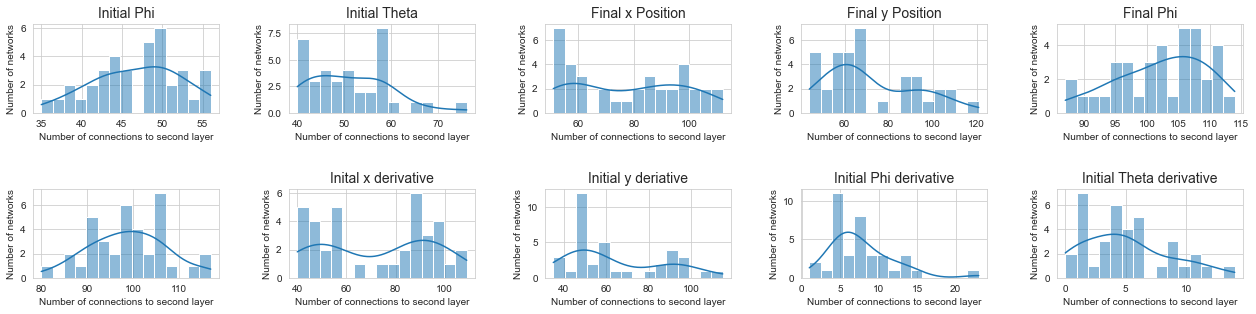

In [44]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroFirstLayer8DF["phi_0"], bins = 15, kde=True)
ax1.set_xlabel("Number of connections to second layer", fontsize=10)
ax1.set_ylabel("Number of networks", fontsize=10)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer8DF["theta_0"], bins = 15, kde=True)
ax2.set_xlabel("Number of connections to second layer", fontsize=10)
ax2.set_ylabel("Number of networks", fontsize=10)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer8DF["x_99"], bins = 15, kde=True)
ax3.set_xlabel("Number of connections to second layer", fontsize=10)
ax3.set_ylabel("Number of networks", fontsize=10)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer8DF["y_99"], bins = 15, kde=True)
ax4.set_xlabel("Number of connections to second layer", fontsize=10)
ax4.set_ylabel("Number of networks", fontsize=10)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer8DF["phi_99"], bins = 15, kde=True)
ax5.set_xlabel("Number of connections to second layer", fontsize=10)
ax5.set_ylabel("Number of networks", fontsize=10)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer8DF["theta_99"], bins = 15, kde=True)
ax6.set_xlabel("Number of connections to second layer", fontsize=10)
ax6.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer8DF["x_dot_0"], bins = 15, kde=True)
ax7.set_xlabel("Number of connections to second layer", fontsize=10)
ax7.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer8DF["y_dot_0"], bins = 15, kde=True)
ax8.set_xlabel("Number of connections to second layer", fontsize=10)
ax8.set_ylabel("Number of networks", fontsize=10)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer8DF["phi_dot_0"], bins = 15, kde=True)
ax9.set_xlabel("Number of connections to second layer", fontsize=10)
ax9.set_ylabel("Number of networks", fontsize=10)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer8DF["theta_dot_0"], bins = 15, kde=True)
ax10.set_xlabel("Number of connections to second layer", fontsize=10)
ax10.set_ylabel("Number of networks", fontsize=10)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


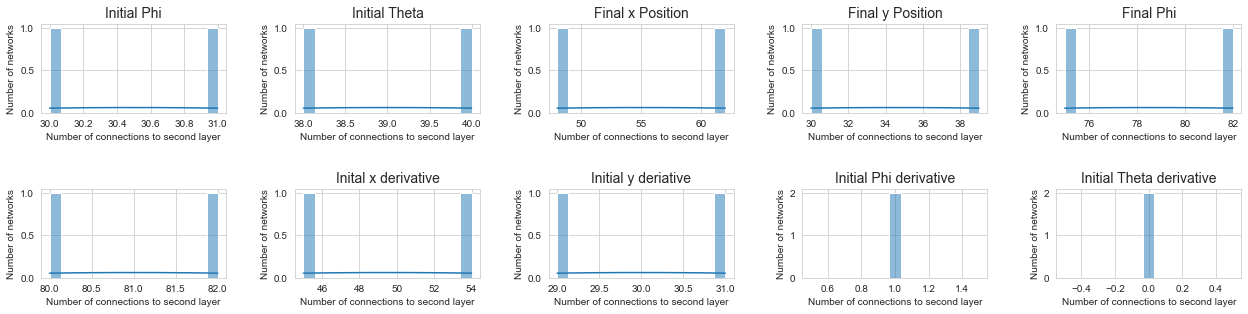

In [45]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroFirstLayer9DF["phi_0"], bins = 15, kde=True)
ax1.set_xlabel("Number of connections to second layer", fontsize=10)
ax1.set_ylabel("Number of networks", fontsize=10)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer9DF["theta_0"], bins = 15, kde=True)
ax2.set_xlabel("Number of connections to second layer", fontsize=10)
ax2.set_ylabel("Number of networks", fontsize=10)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer9DF["x_99"], bins = 15, kde=True)
ax3.set_xlabel("Number of connections to second layer", fontsize=10)
ax3.set_ylabel("Number of networks", fontsize=10)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer9DF["y_99"], bins = 15, kde=True)
ax4.set_xlabel("Number of connections to second layer", fontsize=10)
ax4.set_ylabel("Number of networks", fontsize=10)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer9DF["phi_99"], bins = 15, kde=True)
ax5.set_xlabel("Number of connections to second layer", fontsize=10)
ax5.set_ylabel("Number of networks", fontsize=10)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer9DF["theta_99"], bins = 15, kde=True)
ax6.set_xlabel("Number of connections to second layer", fontsize=10)
ax6.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer9DF["x_dot_0"], bins = 15, kde=True)
ax7.set_xlabel("Number of connections to second layer", fontsize=10)
ax7.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer9DF["y_dot_0"], bins = 15, kde=True)
ax8.set_xlabel("Number of connections to second layer", fontsize=10)
ax8.set_ylabel("Number of networks", fontsize=10)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer9DF["phi_dot_0"], bins = 15, kde=True)
ax9.set_xlabel("Number of connections to second layer", fontsize=10)
ax9.set_ylabel("Number of networks", fontsize=10)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer9DF["theta_dot_0"], bins = 15, kde=True)
ax10.set_xlabel("Number of connections to second layer", fontsize=10)
ax10.set_ylabel("Number of networks", fontsize=10)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

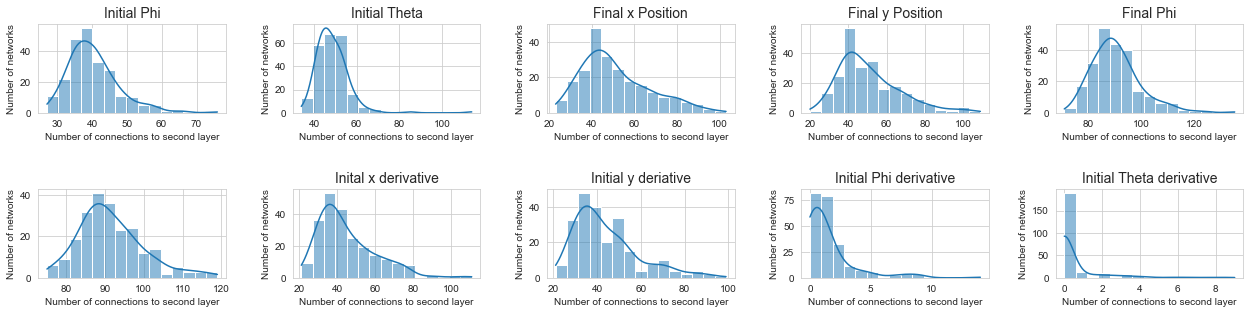

In [46]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroFirstLayer10DF["phi_0"], bins = 15, kde=True)
ax1.set_xlabel("Number of connections to second layer", fontsize=10)
ax1.set_ylabel("Number of networks", fontsize=10)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer10DF["theta_0"], bins = 15, kde=True)
ax2.set_xlabel("Number of connections to second layer", fontsize=10)
ax2.set_ylabel("Number of networks", fontsize=10)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer10DF["x_99"], bins = 15, kde=True)
ax3.set_xlabel("Number of connections to second layer", fontsize=10)
ax3.set_ylabel("Number of networks", fontsize=10)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer10DF["y_99"], bins = 15, kde=True)
ax4.set_xlabel("Number of connections to second layer", fontsize=10)
ax4.set_ylabel("Number of networks", fontsize=10)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer10DF["phi_99"], bins = 15, kde=True)
ax5.set_xlabel("Number of connections to second layer", fontsize=10)
ax5.set_ylabel("Number of networks", fontsize=10)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer10DF["theta_99"], bins = 15, kde=True)
ax6.set_xlabel("Number of connections to second layer", fontsize=10)
ax6.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer10DF["x_dot_0"], bins = 15, kde=True)
ax7.set_xlabel("Number of connections to second layer", fontsize=10)
ax7.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer10DF["y_dot_0"], bins = 15, kde=True)
ax8.set_xlabel("Number of connections to second layer", fontsize=10)
ax8.set_ylabel("Number of networks", fontsize=10)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer10DF["phi_dot_0"], bins = 15, kde=True)
ax9.set_xlabel("Number of connections to second layer", fontsize=10)
ax9.set_ylabel("Number of networks", fontsize=10)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer10DF["theta_dot_0"], bins = 15, kde=True)
ax10.set_xlabel("Number of connections to second layer", fontsize=10)
ax10.set_ylabel("Number of networks", fontsize=10)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

/Users/oliviathomas/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


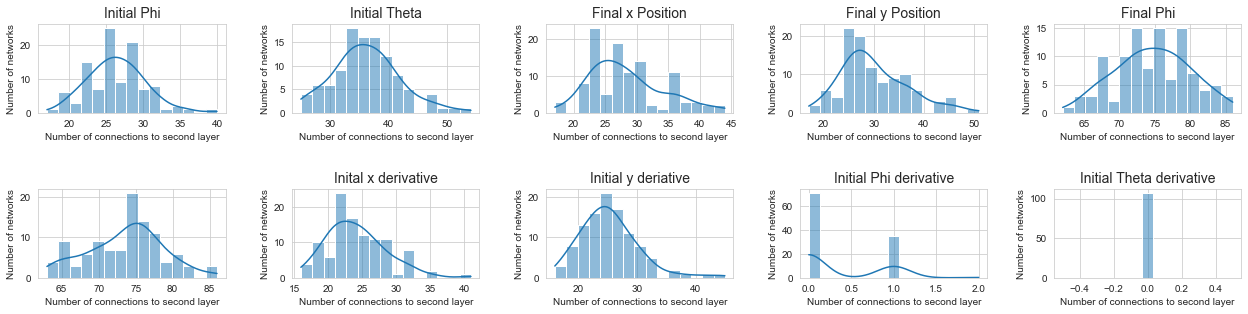

In [47]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroFirstLayer11DF["phi_0"], bins = 15, kde=True)
ax1.set_xlabel("Number of connections to second layer", fontsize=10)
ax1.set_ylabel("Number of networks", fontsize=10)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer11DF["theta_0"], bins = 15, kde=True)
ax2.set_xlabel("Number of connections to second layer", fontsize=10)
ax2.set_ylabel("Number of networks", fontsize=10)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer11DF["x_99"], bins = 15, kde=True)
ax3.set_xlabel("Number of connections to second layer", fontsize=10)
ax3.set_ylabel("Number of networks", fontsize=10)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer11DF["y_99"], bins = 15, kde=True)
ax4.set_xlabel("Number of connections to second layer", fontsize=10)
ax4.set_ylabel("Number of networks", fontsize=10)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer11DF["phi_99"], bins = 15, kde=True)
ax5.set_xlabel("Number of connections to second layer", fontsize=10)
ax5.set_ylabel("Number of networks", fontsize=10)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer11DF["theta_99"], bins = 15, kde=True)
ax6.set_xlabel("Number of connections to second layer", fontsize=10)
ax6.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer11DF["x_dot_0"], bins = 15, kde=True)
ax7.set_xlabel("Number of connections to second layer", fontsize=10)
ax7.set_ylabel("Number of networks", fontsize=10)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer11DF["y_dot_0"], bins = 15, kde=True)
ax8.set_xlabel("Number of connections to second layer", fontsize=10)
ax8.set_ylabel("Number of networks", fontsize=10)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer11DF["phi_dot_0"], bins = 15, kde=True)
ax9.set_xlabel("Number of connections to second layer", fontsize=10)
ax9.set_ylabel("Number of networks", fontsize=10)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer11DF["theta_dot_0"], bins = 15, kde=True)
ax10.set_xlabel("Number of connections to second layer", fontsize=10)
ax10.set_ylabel("Number of networks", fontsize=10)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

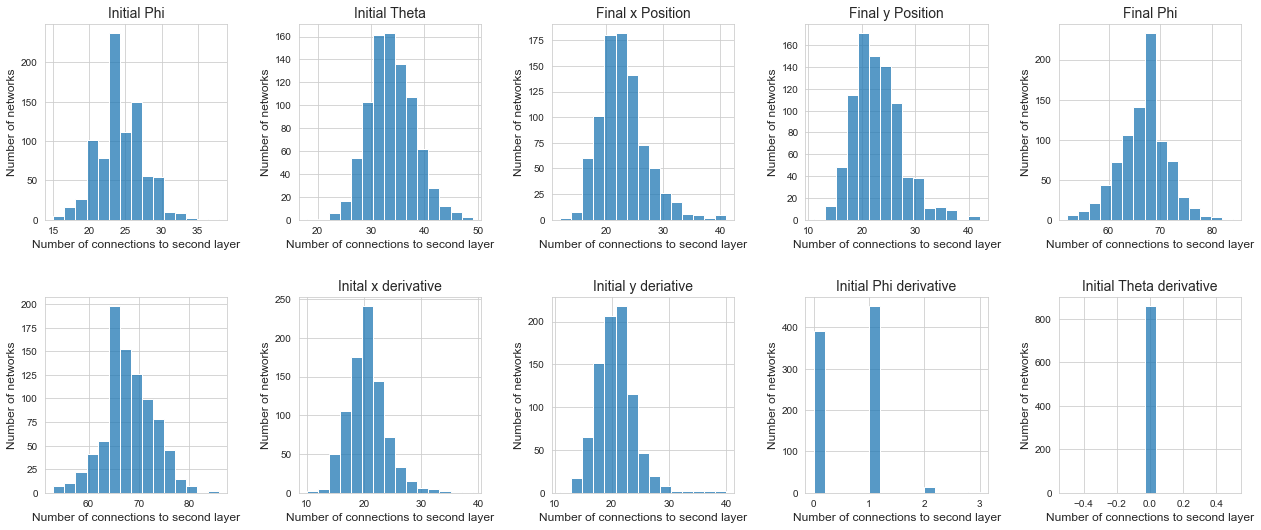

In [48]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,8))
sb.histplot(ax= ax1, data=nonZeroFirstLayer12DF["phi_0"], bins = 15)
ax1.set_xlabel("Number of connections to second layer", fontsize=12)
ax1.set_ylabel("Number of networks", fontsize=12)
ax1.set_title("Initial Phi",fontsize=14)
sb.histplot(ax= ax2, data=nonZeroFirstLayer12DF["theta_0"], bins = 15)
ax2.set_xlabel("Number of connections to second layer", fontsize=12)
ax2.set_ylabel("Number of networks", fontsize=12)
ax2.set_title("Initial Theta",fontsize=14)
sb.histplot(ax= ax3, data=nonZeroFirstLayer12DF["x_99"], bins = 15)
ax3.set_xlabel("Number of connections to second layer", fontsize=12)
ax3.set_ylabel("Number of networks", fontsize=12)
ax3.set_title("Final x Position",fontsize=14)
sb.histplot(ax= ax4, data=nonZeroFirstLayer12DF["y_99"], bins = 15)
ax4.set_xlabel("Number of connections to second layer", fontsize=12)
ax4.set_ylabel("Number of networks", fontsize=12)
ax4.set_title("Final y Position",fontsize=14)
sb.histplot(ax= ax5, data=nonZeroFirstLayer12DF["phi_99"], bins = 15)
ax5.set_xlabel("Number of connections to second layer", fontsize=12)
ax5.set_ylabel("Number of networks", fontsize=12)
ax5.set_title("Final Phi",fontsize=14)
sb.histplot(ax= ax6, data=nonZeroFirstLayer12DF["theta_99"], bins = 15)
ax6.set_xlabel("Number of connections to second layer", fontsize=12)
ax6.set_ylabel("Number of networks", fontsize=12)
ax7.set_title("Final Theta",fontsize=14)
sb.histplot(ax= ax7, data=nonZeroFirstLayer12DF["x_dot_0"], bins = 15)
ax7.set_xlabel("Number of connections to second layer", fontsize=12)
ax7.set_ylabel("Number of networks", fontsize=12)
ax7.set_title("Inital x derivative",fontsize=14)
sb.histplot(ax= ax8, data=nonZeroFirstLayer12DF["y_dot_0"], bins = 15)
ax8.set_xlabel("Number of connections to second layer", fontsize=12)
ax8.set_ylabel("Number of networks", fontsize=12)
ax8.set_title("Initial y deriative",fontsize=14)
sb.histplot(ax= ax9, data=nonZeroFirstLayer12DF["phi_dot_0"], bins = 15)
ax9.set_xlabel("Number of connections to second layer", fontsize=12)
ax9.set_ylabel("Number of networks", fontsize=12)
ax9.set_title("Initial Phi derivative",fontsize=14)
sb.histplot(ax= ax10, data=nonZeroFirstLayer12DF["theta_dot_0"], bins = 15)
ax10.set_xlabel("Number of connections to second layer", fontsize=12)
ax10.set_ylabel("Number of networks", fontsize=12)
ax10.set_title("Initial Theta derivative",fontsize=14)

fig.tight_layout(pad=3.0)

In [49]:
percentnonZeroFirstLayer12DF = nonZeroFirstLayer12DF/400*100

In [50]:
percentnonZeroFirstLayer12DF

,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0
0,5.75,8.00,5.75,5.25,17.25,17.50,5.00,5.25,0.00,0.0
1,6.25,7.25,4.00,9.25,13.75,17.00,4.25,8.75,0.25,0.0
2,5.75,7.50,7.25,4.50,16.75,17.75,6.50,3.75,0.00,0.0
3,6.75,9.75,6.00,4.75,15.75,17.75,4.75,4.00,0.25,0.0
4,4.75,7.75,5.25,7.00,16.50,17.75,4.75,5.75,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...
853,6.00,8.50,6.50,5.25,16.75,17.25,4.50,5.00,0.00,0.0
854,6.25,8.50,5.75,4.75,17.00,16.50,5.50,5.25,0.25,0.0
855,6.25,9.00,5.75,5.00,17.75,16.00,5.00,5.25,0.00,0.0
856,8.00,7.25,5.00,6.25,15.50,17.75,4.75,5.25,0.00,0.0


In [51]:
cols = percentnonZeroFirstLayer12DF.columns.tolist()
cols

['phi_0',
 'theta_0',
 'x_99',
 'y_99',
 'phi_99',
 'theta_99',
 'x_dot_0',
 'y_dot_0',
 'phi_dot_0',
 'theta_dot_0']

In [52]:
cols = ['phi_0','theta_0','x_dot_0','y_dot_0','phi_dot_0','theta_dot_0','x_99','y_99','phi_99','theta_99']
percentnonZeroFirstLayer12DF = percentnonZeroFirstLayer12DF[cols]
percentnonZeroFirstLayer12DF

,phi_0,theta_0,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,x_99,y_99,phi_99,theta_99
0,5.75,8.00,5.00,5.25,0.00,0.0,5.75,5.25,17.25,17.50
1,6.25,7.25,4.25,8.75,0.25,0.0,4.00,9.25,13.75,17.00
2,5.75,7.50,6.50,3.75,0.00,0.0,7.25,4.50,16.75,17.75
3,6.75,9.75,4.75,4.00,0.25,0.0,6.00,4.75,15.75,17.75
4,4.75,7.75,4.75,5.75,0.25,0.0,5.25,7.00,16.50,17.75
...,...,...,...,...,...,...,...,...,...,...
853,6.00,8.50,4.50,5.00,0.00,0.0,6.50,5.25,16.75,17.25
854,6.25,8.50,5.50,5.25,0.25,0.0,5.75,4.75,17.00,16.50
855,6.25,9.00,5.00,5.25,0.00,0.0,5.75,5.00,17.75,16.00
856,8.00,7.25,4.75,5.25,0.00,0.0,5.00,6.25,15.50,17.75


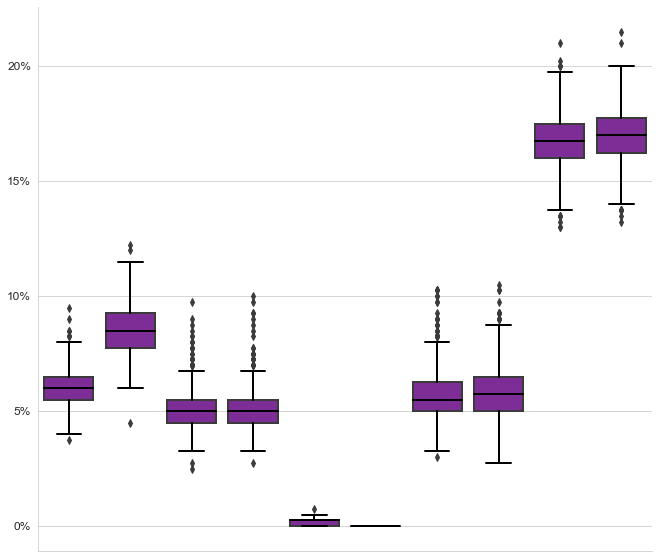

In [58]:
fig, ax1 = plt.subplots(1, figsize = (11,10))
sb.boxplot(data=percentnonZeroFirstLayer12DF, color='#7D2E96', saturation=3, linewidth=2)
plt.yticks([0,5,10,15,20],['0%','5%','10%','15%','20%'], fontsize=12)
ax1.axes.xaxis.set_ticklabels([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for line in ax1.get_lines():
    line.set_color('black')


In [ ]:
nonZeroLastLayer = np.zeros((852,7))

for i in range(len(sparseNets12DF['layer 5'])):
    nonZeroLastLayer[i] = np.count_nonzero(sparseNets12DF['layer 5'][i], axis=0)

In [ ]:
nonZeroLastLayer

In [ ]:
nonZeroLastLayerDF = pd.DataFrame(nonZeroLastLayer, columns=["Fx", "Fy", "tau", "x_dot_99", "y_dot_99", 
                    "phi_dot_99", "theta_dot_99"])

In [ ]:
nonZeroLastLayerDF

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize = (18,5))
sb.histplot(ax= ax1, data=nonZeroLastLayerDF["Fx"], bins = 20)
sb.histplot(ax= ax2, data=nonZeroLastLayerDF["Fy"], bins = 20)
sb.histplot(ax= ax3, data=nonZeroLastLayerDF["tau"], bins = 20)
sb.histplot(ax= ax4, data=nonZeroLastLayerDF["x_dot_99"], bins = 20)
sb.histplot(ax= ax5, data=nonZeroLastLayerDF["y_dot_99"], bins = 20)
sb.histplot(ax= ax6, data=nonZeroLastLayerDF["phi_dot_99"], bins = 20)
sb.histplot(ax= ax7, data=nonZeroLastLayerDF["theta_dot_99"], bins = 20)

fig.tight_layout(pad=3.0)